# Statistical Analysis of Data on Pull-Request Governance Models in FOSS Commununities
**by Raul Pardo, Adam Alami and Andrzej Wąsowski**

In this notebook we study how different Free & Open-Source Software (FOSS) communities handle Pull Requests (PRs). In particular, we compare how _protective_, _equitable_ and _lenient_ FOSS communities are in handling PRs. 

This is a mixed methods study (qualitative and quantitative). The findings of the first component were published in the publication listed below:
Alami, Adam, Marisa Leavitt Cohn, and Andrzej Wasowski. "How Do FOSS Communities Decide to Accept Pull Requests?" In Proceedings of the Evaluation and Assessment on Software Engineering (EASE'20).

This notebook is the stastical analysis of the quantitative data for a new paper under submission.






## The Goals of the Analysis

We have collected information related to PR handling from members of the following FOSS communities [NOTE: reference to the study]: FOSSASIA, Odoo, DuckDuckGo, Linux Kernel, Coala, ROS, Plone, ReactJS, AngularJS, NodeJS, OpenGenus, Mozilla, OpenSUSE, jQuery, Apache. 387 respondents have indicated their project as 'Other' (than the above listed).

We asked the respondents (open source software contributors) 12 questions, some with several subquestions, which clarify how they handle pull request evaluation in their communities, how they act when they are evaluators, and how do they feel when they are contributors, subjected  to evaluation.  The attached dataset contains only answers to 7 qantitative questions relevant for this analysis.  We repeat these questions here for your convenience:

**V27.** *In general I  say no to most pull requests (PR)/patches. The contributor has to be persistent and prove that the PR/patch worth evaluating.*

**V28.** *I don't consider a pull request/patch, unless I trust the contributor.*

**V29.** *I don't consider a pull request/patch, unless the contributor is reliable.*

**V30.** *I don't consider a pull request/patch, unless I have a strong relationship with the contributor.*

**V31.** *I assess every pull request/patch in the same manner irrespective of the contributor.*

**V32.** *I assess pull requests/patches purely on technical grounds.*

**V33.** *I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.*

Each of the questions was given a closed answer on a 5-step Likert-scale: (1) I strongly agree, (2) I agree, (3) Neutral, (4) I disagree, (5) I strongly disagree.

We are interested in comparing how *protective*, *equitable* and *lenient* the different communities are. Below we precisely describe the criteria to classify a community within a category.

**Protective.** A community is classified as “Protective” when the response from this community is positive in at least one of these variables V28 (“I don't consider a pull request/patch, unless I trust the contributor”), V29 (“I don't consider a pull request/patch, unless the contributor is reliable.”), and V30 (“I don't consider a pull request/patch, unless I have a strong relationship with the contributor.”). It is possible that positive evaluations of V27 (“In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.

**Equitable.** A community is classified as “Equitable” when the response from this community is positive in at least one of these variables V31 (“I assess every pull request/patch in the same manner irrespective of the contributor.”), V32 (“I assess pull requests/patches purely on technical grounds.”).  The equitability in community is expected to find positive answers on V31, V32 which have different tone compared to V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”) in question.

**Lenient.** A community is classified as “Lenient” when the response from this community is positive V33 (“I never say no to a pull request/patch. If the quality of the PR/patch is not mergeable, then I mentor the contributor to elevate his/her PR/patch to a mergeable state.”).

The table below summarizes the variables we study for each category. For a category $c \in \{\mathit{protective, equitable, lenient}\}$ and the set of variables for that category (denoted as $V_c$), we say that a community is $c$ iff it is positive (see remark above) to either of the questions in $V_c$. For instance, we say that a community is *lenient* iff it is positive to either *V31* or *V32*.


| Category   | ID   | Variable                                                                                                           |
|------------|------|--------------------------------------------------------------------------------------------------------------------|
| Protective |      |                                                                                                                    |
|            | V27  | In general I  say no to most pull requests (PR)/patches”) can be included in this evaluation too.                  |
|            | V28  | I don't consider a pull request/patch, unless I trust the contributor.                                             |
|            | V29  | I don't consider a pull request/patch, unless the contributor is reliable.                                         |
|            | V30  | I don't consider a pull request/patch, unless I have a strong relationship with the contributor.                   |
| Equitable  |      |                                                                                                                    |
|            | V31  | I assess every pull request/patch in the same manner irrespective of the contributor.                              |
|            | V32  | I assess pull requests/patches purely on technical grounds.                                                        |
| Lenient    |      |                                                                                                                    |
|            | V33  | I never say no to a pull request/patch. I mentor the contributor to elevate his/her PR/patch to a mergeable state. |

## Hypothesis

We test the veracity of the following hypotheses using Bayesian Data Analysis [[Kruschke 2004]](#[Kruschke-2015]-John-Kruschke.-Doing-Bayesian-Data-Analysis.-2nd-edition.-2015.).

| ID | Hypothesis Statement                                                                                                              |
|----|-----------------------------------------------------------------------------------------------------------------------------------|
| H1 | The Coala community adopts a lenient style of governance for its pull request process.                                            |
| H2 | The Linux Kernel community adopts a protective style of governance for its code change process.                                   |
| H3 | The Coala Community is more lenient than the Linux Kernel Community.                                                              |
| H4 | The FOSSASIA community adopts an equitable style of governance for its pull request process.                                      |
| H5 | The Odoo community adopts an equitable style of governance for its pull request process.                                          |
| H6 | Each of the 15 FOSS communities adopts a governance style, either protective, equitable or lenient, for its pull request process. |

This notebook describes in detail the analysis for each of these hypothesis.

## Table of Content

To facilitate navigation, here is a table of content with the main sections of the notebook. We encourage readers mostly interested in the analysis to skip the [Setup](#Setup) section.

1. [Setup](#Setup)
1. [Raw Data](#Raw-Data)
2. [Bayesian Model](#Bayesian-Model)
3. [Hypothesis Analysis](#Hypothesis-Analysis)
    * [ [H1](#H1:-The-Coala-community-adopts-a-lenient-style-of-governancefor-its-pull-request-process) | [H2](#H2:-The-Linux-Kernel-community-adopts-a-protective-style-of-governance-for-its-code-change-process) | [H3](#H3:-The-Coala-Community-is-more-lenient-than-the-Linux-Kernel-Community) | [H4 & H5](#H4-&-H5-The--FOSSASIA--community--adopts--an--equitable--style--of-governance-for-its-pull-request-process-|-The-Odoo-community-adopts-an-equitable-style-of-governance-for-its-pull-request-process) | [H6](#H6:-Each-of-the-15-FOSS-communities-adopts-a-governance-style,-either-protective,-equitable-or-lenient,-for-its-pull-request-process) ]
4. [Appendix]()
    * [2D plots comparing governance styles](#2-dimensional-comparison-of-governance-styles)
    * [3D plot comparing governance styles](#2-dimensional-comparison-of-governance-styles)
    * Posterior Predictive Checks and trace diagnosis for [V27](#Question-V27), [V28](#Question-V28), [V29](#Question-V29), [V30](#Question-V30), [V31](#Question-V31), [V32](#Question-V32) and [V33](#Question-V33).

## Setup

We start by importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt

from theano.compile.ops import as_op
from scipy.stats import norm
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from IPython.display import Image
import seaborn as sns
import pymc3 as pm
import numpy as np
from scipy.stats import norm
import pandas as pd
import arviz as az # for storing traces
import pickle

import theano.tensor as T
from theano.compile.ops import as_op

%matplotlib inline
plt.style.use('seaborn-white')

color = '#87ceeb'

f_dict = {'size':14}

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Additionally, we define several auxiliry functions to assit in handling the data and generating plots for the analyses.

In [61]:
# Auxiliary functions

########################
## Index manipulation ##
########################

# reduce data values by 1 so that they become indexes for the cdf array below.
# the .cat.codes function from pandas doesn't work because it assings codes depending on the different values of the data
def from_data_to_code(x):
    return int(x)-1

def codes(self):
    return np.array([from_data_to_code(x) for x in self])

def count_per_data_value(d,c,q):
    return np.array([ len(d[(d[q] == x) & (d.Community==c)][q]) for x in ['1','2','3','4','5']])

def comm_to_code(d,c):
    return [code for (comm,code) in zip(d.Community.unique(),d.Community.cat.codes.unique()) if comm==c][0]


########################
## Plotting functions ##
########################

# Countplot without -1s
def plot_count(q):
    plt.figure(figsize=(30,10))
    sns.countplot(x=df2[df2[q]!='-1'].Community,
                  hue=df2[df2[q]!='-1'][q])
    plt.suptitle('Data for question '+q)
    plt.show()

# Mean density plots of answers to variable v for all communities
def mean_densities(t,v):
    plt.figure(figsize=(15,5))
    NUM_COLORS = 16
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in np.linspace(0, 1, NUM_COLORS)]
    grp_idxs_colors_grp_names = zip(df2.Community.cat.codes.unique(),colors,df2.Community.unique())
    [pm.plot_kde(t['mu'][:,i], 
                 plot_kwargs={'color': c}, cumulative=False, 
                 label=n) 
      for (i,c,n) in grp_idxs_colors_grp_names]
    plt.xlim([0,7])
    plt.legend(loc='best')
    plt.suptitle('Mean density plots for '+v)
    plt.show()

# Posterior predictive check: plotting several draws of inferred normal and mean normal
def plot_ppc_normal_density(d,t,c,q):
    c_code=comm_to_code(d,c)
    x=np.arange(-5,10,step=.01)
    s=pd.Series((count_per_data_value(df2,c,q)/count_per_data_value(df2,c,q).sum()))
    s.index=s.index+1
    s.plot.bar(rot=0, color='royalblue')
    plt.suptitle('Data of '+c+' question '+q)
    [plt.plot(x,norm(loc=m,scale=s).pdf(x),color='lightblue',alpha=.05) 
        for (m,s) in zip(t['mu'][18000:,c_code],t['sigma'][18000:,  c_code])]
    plt.plot(x,norm(loc=np.mean(t['mu'][:,c_code]),scale=np.mean(t['sigma'][:,c_code])).pdf(x),color='blue',linewidth=2)
    plt.xlim([-1,7])
    plt.show()

# Posterior predictive check: plotting data bars together with cdf and HDI
def ppc_count_cdfs(trace2,df2,com1,q):
    mu2 = trace2['mu']
    sigma2 = trace2['sigma']
    code_com1 = comm_to_code(df2,com1)
    
    # Concatenate the fixed thresholds into the estimated thresholds
    n = trace2['theta_missing'].shape[0]
    thresholds2 = np.c_[np.tile([1.5], (n,1)),
                        trace2['theta_missing'],
                        np.tile([4.5], (n,1))]

    fig, ax1 = plt.subplots(1, figsize=(10,4))

    # Posterior predictive probabilities of the outcomes
    threshCumProb2A = np.empty(thresholds2.shape)
    for i in np.arange(threshCumProb2A.shape[0]):
        threshCumProb2A[i] = norm().cdf((thresholds2[i] - mu2[i,code_com1])/sigma2[i,code_com1])    
    outProb2A = (np.c_[threshCumProb2A, np.tile(1, (thresholds2.shape[0],1))]
           - np.c_[np.tile(0, (thresholds2.shape[0],1)), threshCumProb2A])
    yerr2A = np.abs(np.subtract(pm.hpd(outProb2A), outProb2A.mean(axis=0).reshape(-1,1)))

    ax1.errorbar(x = np.arange(outProb2A.shape[1]), y=outProb2A.mean(axis=0),
                 yerr=yerr2A.T, color='darkblue', fmt='o', capthick=3)

    # Count bars from the data
    pd.Series((count_per_data_value(df2,com1,q)/count_per_data_value(df2,com1,q).sum())).plot.bar(ax=ax1, rot=0, color='royalblue')
    ax1.set_title('Data for {0} with Post. Pred.\nN = {1}'.format(com1, df2[(df2.Community == com1) & (df2[q]!='-1') ][q].size))#, fontdict=f_dict)
    ax1.set_xlabel('y')
    ax1.set_xticklabels(['1','2','3','4','5'])
    ax1.yaxis.set_visible(False)

    plt.show()
    
# Comparison of two communities code (original code from XXX)
def com(trace2,df2,com1,com2,q):
    mu2 = trace2['mu']
    sigma2 = trace2['sigma']
    code_com1 = comm_to_code(df2,com1)
    code_com2 = comm_to_code(df2,com2)
    
    # Concatenate the fixed thresholds into the estimated thresholds
    n = trace2['theta_missing'].shape[0]
    thresholds2 = np.c_[np.tile([1.5], (n,1)),
                        trace2['theta_missing'],
                        np.tile([4.5], (n,1))]

    fig, axes = plt.subplots(5,2, figsize=(10,14))
    ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10 = axes.flatten() 

    # Mu
    pm.plot_posterior(mu2[:,code_com1], point_estimate='mode', color=color, ax=ax1)
    ax1.set_xlabel('$\mu_{1}$', fontdict=f_dict)
    pm.plot_posterior(mu2[:,code_com2], point_estimate='mode', color=color, ax=ax3)
    ax3.set_xlabel('$\mu_{2}$', fontdict=f_dict)
    for title, ax in zip([com1, com2], [ax1, ax3]):
        ax.set_title(title, fontdict=f_dict)

    # Sigma
    pm.plot_posterior(sigma2[:,code_com1], point_estimate='mode', color=color, ax=ax5)
    ax5.set_xlabel('$\sigma_{1}$', fontdict=f_dict)
    pm.plot_posterior(sigma2[:,code_com2], point_estimate='mode', color=color, ax=ax7)
    ax7.set_xlabel('$\sigma_{2}$', fontdict=f_dict)
    for title, ax in zip([com1+' Std. Dev.', com2+' Std. Dev.'], [ax5, ax7]):
        ax.set_title(title, fontdict=f_dict)

    # Posterior distribution on the thresholds
    ax9.scatter(thresholds2, np.tile(thresholds2.mean(axis=1).reshape(-1,1), (1,4)), color=color, alpha=.6, facecolor='none')
    ax9.set_ylabel('Mean Threshold', fontdict=f_dict)
    ax9.set_xlabel('Threshold', fontdict=f_dict)
    ax9.vlines(x = thresholds2.mean(axis=0),
               ymin=thresholds2.mean(axis=1).min(),
               ymax=thresholds2.mean(axis=1).max(), linestyles='dotted', colors=color)

    # Posterior predictive probabilities of the outcomes
    threshCumProb2A = np.empty(thresholds2.shape)
    for i in np.arange(threshCumProb2A.shape[0]):
        threshCumProb2A[i] = norm().cdf((thresholds2[i] - mu2[i,code_com1])/sigma2[i,code_com1])    
    outProb2A = (np.c_[threshCumProb2A, np.tile(1, (thresholds2.shape[0],1))]
           - np.c_[np.tile(0, (thresholds2.shape[0],1)), threshCumProb2A])
    yerr2A = np.abs(np.subtract(pm.hpd(outProb2A), outProb2A.mean(axis=0).reshape(-1,1)))

    ax2.errorbar(x = np.arange(outProb2A.shape[1]), y=outProb2A.mean(axis=0),
                 yerr=yerr2A.T, color=color, fmt='o')

    threshCumProb2B = np.empty(thresholds2.shape)
    for i in np.arange(threshCumProb2B.shape[0]):
        threshCumProb2B[i] = norm().cdf((thresholds2[i] - mu2[i,code_com2])/sigma2[i,code_com2])    
    outProb2B = (np.c_[threshCumProb2B, np.tile(1, (thresholds2.shape[0],1))]
               - np.c_[np.tile(0, (thresholds2.shape[0],1)), threshCumProb2B])
    yerr2B = np.abs(np.subtract(pm.hpd(outProb2B), outProb2B.mean(axis=0).reshape(-1,1)))

    ax4.errorbar(x = np.arange(outProb2B.shape[1]), y=outProb2B.mean(axis=0),
             yerr=yerr2B.T, color=color, fmt='o')

    for grp, ax in zip([com1, com2], [ax2, ax4]):
        pd.Series((count_per_data_value(df2,grp,q)/count_per_data_value(df2,grp,q).sum())).plot.bar(ax=ax, rot=0, color='royalblue')
        ax.set_title('Data for {0} with Post. Pred.\nN = {1}'.format(grp, df2[(df2.Community == grp) & (df2[q]!='-1') ][q].size), fontdict=f_dict)
        ax.set_xlabel('y')
        sns.despine(ax=ax, left=True)
        ax.yaxis.set_visible(False)

    # Mu diff
    pm.plot_posterior(mu2[:,code_com2]-mu2[:,code_com1], point_estimate='mode', color=color, ax=ax6)
    ax6.set_xlabel('$\mu_{2}-\mu_{1}$', fontdict=f_dict)
    # Sigma diff
    pm.plot_posterior(sigma2[:,code_com2]-sigma2[:,code_com1], point_estimate='mode', color=color, ax=ax8)
    ax8.set_xlabel('$\sigma_{2}-\sigma_{1}$', fontdict=f_dict)
    # Effect size
    pm.plot_posterior((mu2[:,code_com2]-mu2[:,code_com1]) / np.sqrt((sigma2[:,code_com1]**2+sigma2[:,code_com2]**2)/2), point_estimate='mode', color=color, ax=ax10)
    ax10.set_xlabel(r'$\frac{(\mu_2-\mu_1)}{\sqrt{(\sigma_1^2+\sigma_2^2)/2}}$', fontdict=f_dict)
    for title, ax in zip(['Differences of Means', 'Difference of Std. Dev\'s', 'Effect Size'], [ax6, ax8, ax10]):
        ax.set_title(title, fontdict=f_dict)

    fig.suptitle(q, fontsize=16)
    fig.tight_layout()
    
    
### Inference data plotting
# Mean density plots of answers to variable v for all communities
def mean_densities_inferencedata(t,v):
    t_mu=np.concatenate(t.posterior['mu'].to_masked_array(),axis=0)
    plt.figure(figsize=(15,5))
    NUM_COLORS = 16
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in np.linspace(0, 1, NUM_COLORS)]
    grp_idxs_colors_grp_names = zip(df2.Community.cat.codes.unique(),colors,df2.Community.unique())
    [pm.plot_kde(t_mu[:,i], 
                 plot_kwargs={'color': c}, cumulative=False, 
                 label=n) 
      for (i,c,n) in grp_idxs_colors_grp_names]
    plt.xlim([0,7])
    plt.legend(loc='best')
    plt.suptitle('Mean density plots for '+v)
    plt.show()
    
# Posterior predictive check: plotting several draws of inferred normal and mean normal
def plot_ppc_normal_density_inferencedata(d,t,c,q):
    t_mu=np.concatenate(t.posterior['mu'].to_masked_array(),axis=0)
    t_sigma=np.concatenate(t.posterior['sigma'].to_masked_array(),axis=0)
    
    c_code=comm_to_code(d,c)
    x=np.arange(-5,10,step=.01)
    s=pd.Series((count_per_data_value(df2,c,q)/count_per_data_value(df2,c,q).sum()))
    s.index=s.index+1
    s.plot.bar(rot=0, color='royalblue')
    plt.suptitle('Data of '+c+' question '+q)
    [plt.plot(x,norm(loc=m,scale=s).pdf(x),color='lightblue',alpha=.05) 
        for (m,s) in zip(t_mu[18000:,c_code],t_sigma[18000:,  c_code])]
    plt.plot(x,norm(loc=np.mean(t_mu[:,c_code]),scale=np.mean(t_sigma[:,c_code])).pdf(x),color='blue',linewidth=2)
    plt.xlim([-1,7])
    plt.show()
    
# Posterior predictive check: plotting data bars together with cdf and HDI
def ppc_count_cdfs_inferencedata(t,df2,com1,q):
    mu2 = np.concatenate(t.posterior['mu'].to_masked_array(),axis=0)#trace2['mu']
    sigma2 = np.concatenate(t.posterior['sigma'].to_masked_array(),axis=0)#trace2['sigma']
    theta_missing2 = np.concatenate(t.posterior['theta_missing'].to_masked_array(),axis=0)#trace2['sigma']
    code_com1 = comm_to_code(df2,com1)
    
    # Concatenate the fixed thresholds into the estimated thresholds
    n = theta_missing2.shape[0]
    thresholds2 = np.c_[np.tile([1.5], (n,1)),
                        theta_missing2,
                        np.tile([4.5], (n,1))]

    fig, ax1 = plt.subplots(1, figsize=(10,4))

    # Posterior predictive probabilities of the outcomes
    threshCumProb2A = np.empty(thresholds2.shape)
    for i in np.arange(threshCumProb2A.shape[0]):
        threshCumProb2A[i] = norm().cdf((thresholds2[i] - mu2[i,code_com1])/sigma2[i,code_com1])    
    outProb2A = (np.c_[threshCumProb2A, np.tile(1, (thresholds2.shape[0],1))]
           - np.c_[np.tile(0, (thresholds2.shape[0],1)), threshCumProb2A])
    yerr2A = np.abs(np.subtract(pm.hpd(outProb2A), outProb2A.mean(axis=0).reshape(-1,1)))

    ax1.errorbar(x = np.arange(outProb2A.shape[1]), y=outProb2A.mean(axis=0),
                 yerr=yerr2A.T, color='darkblue', fmt='o', capthick=3)

    # Count bars from the data
    pd.Series((count_per_data_value(df2,com1,q)/count_per_data_value(df2,com1,q).sum())).plot.bar(ax=ax1, rot=0, color='royalblue')
    ax1.set_title('Data for {0} with Post. Pred.\nN = {1}'.format(com1, df2[(df2.Community == com1) & (df2[q]!='-1') ][q].size))#, fontdict=f_dict)
    ax1.set_xlabel('y')
    ax1.set_xticklabels(['1','2','3','4','5'])
    ax1.yaxis.set_visible(False)

    plt.show()

## Raw Data 

First we load the dataset.

In [8]:
## Loading data
df2 = pd.read_csv('../data/pseudonymized-data.csv', 
                  dtype={'Community':'category',
                               'V27':'category',
                               'V28':'category',
                               'V29':'category',
                               'V30':'category',
                               'V31':'category',
                               'V32':'category',
                               'V33':'category'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Community  387 non-null    category
 1   V27        387 non-null    category
 2   V28        387 non-null    category
 3   V29        387 non-null    category
 4   V30        387 non-null    category
 5   V31        387 non-null    category
 6   V32        387 non-null    category
 7   V33        387 non-null    category
dtypes: category(8)
memory usage: 5.3 KB


In [32]:
## Show first three rows in the dataset
df2[:3]

,Community,V27,V28,V29,V30,V31,V32,V33
0,Comm.FOSSASIA,4,4,4,5,1,1,1
1,Comm.FOSSASIA,5,5,5,5,1,1,1
2,Comm.FOSSASIA,-1,-1,-1,-1,-1,-1,-1


The cells above show a summary of the structure of the dataset and the first 3 rows of the dataset. The dataset has 7 columns: the first indicates the community the participant belongs to, and the remaining the questions under study. 

The complete dataset includes 387 participants of which 190 are mantainers and 197 contributors. The analysis in this notebook targets mantainers (as their behviour is what defines the communities' governance style). Note that there is an entry in the dataset with all answers equal to -1, these correspond to a participant who did not answer that particular question(s). This row corresponds to the answers of a contributor, consequently she did not answer the questions. The analysis will omit the entries from contributors. Thus, we consider a set of 190 participants.



## Bayesian Model

We use a model introduced in [[Kruschke 2015]](#[Kruschke-2015]-John-Kruschke.-Doing-Bayesian-Data-Analysis.-2nd-edition.-2015.) to learn the underlying distribution of _ordinal data_. This model is commonly applied to the analysis of Likert-scale surveys (as the one we are concern with in this analysis). The model is also known as _ordinal regression_.

The model assumes that the answers (data) are normally distributed. Our goal is to learn the parameters $\mu$ and $\sigma$ of the normal 
distribution. To model the probability of an outcome, we compute the density in the interval of the data distribution corresponding to each value. The intervals are defined by some thresholds $\theta_i$ that are parameters of the model. For instance, the probability of outcome 2 is defined by the cumulative density in the interval $(\theta_1,\theta_2)$. Concretely, we use a _generalized linear model (GLM)_ where the inverse-link function is a normal cumulative density (denoted as $\Phi$ with mean $\mu$ and standard deviation $\sigma$). Formally, the probability of each outcome of the likert scale ($k$) is defined as:

$$
p(y = k \mid \mu, \sigma, \{\theta_j \}) = \Phi((\theta_k - \mu)/\sigma ) - \Phi((\theta_{k−1} - \mu)/\sigma )
$$

For the first and last outcomes (0 and 5), we consider the density of the intervals $(-\infty,\theta_1)$ and $(\theta_4,+\infty)$ respectively. Note that $\pm \infty$ is needed because of the support of normal distributions.


We define an inference function creates the ordinal regression model described above for a question VXX (`q` in the code) passed as a parameter. We use as a reference the Kruschke style ordinal regression pymc3 model in [this repository](https://github.com/JWarmenhoven/DBDA-python/blob/master/Notebooks/Chapter%2023.ipynb) for the implementation.

In [43]:
## Inference function

def infer(q,num_samples=10000,tuning=1000,chains=4):
    # Number of outcomes
    nYlevels2 = 5
    # Number of groups
    n_grps = df2.Community.nunique()
    # Group index
    grp_idx = df2[df2[q]!='-1'].Community.cat.codes.values

    thresh2 = np.arange(1.5, nYlevels2, dtype=np.float64)
    thresh_obs2 = np.ma.asarray(thresh2)
    thresh_obs2[1:-1] = np.ma.masked

    print('thresh2:\t{}'.format(thresh2))
    print('thresh_obs2:\t{}'.format(thresh_obs2))


    @as_op(itypes=[tt.dvector, tt.dvector, tt.dvector], otypes=[tt.dmatrix])
    def outcome_probabilities(theta, mu, sigma):
        out = np.empty((nYlevels2, n_grps), dtype=np.float64)
        n = norm(loc=mu, scale=sigma)       
        out[0,:] = n.cdf(theta[0])        
        out[1,:] = np.max([np.repeat(0,n_grps), n.cdf(theta[1]) - n.cdf(theta[0])], axis=0)
        out[2,:] = np.max([np.repeat(0,n_grps), n.cdf(theta[2]) - n.cdf(theta[1])], axis=0)
        out[3,:] = np.max([np.repeat(0,n_grps), n.cdf(theta[3]) - n.cdf(theta[2])], axis=0)
        out[4,:] = 1 - n.cdf(theta[3])
        return out

    ## Model 
    with pm.Model() as ordinal_model_multi_groups:    
        
        theta = pm.Normal('theta', mu=thresh2, tau=np.repeat(.5**2, len(thresh2)),
                          shape=len(thresh2), observed=thresh_obs2)
        
        mu = pm.Normal('mu', mu=nYlevels2/2.0, tau=1.0/(nYlevels2**2), shape=n_grps)
        sigma = pm.Uniform('sigma', nYlevels2/1000.0, nYlevels2*10.0, shape=n_grps)
        
        pr = outcome_probabilities(theta, mu, sigma)
        
        y = pm.Categorical('y', pr[:,grp_idx].T, observed=codes(df2[df2[q]!='-1'][q]))
        
        pm.model_to_graphviz(ordinal_model_multi_groups)
        plt.show()
    
        trace2 = pm.sample(num_samples, tune=tuning, cores=chains)
        
        az.from_pymc3(trace2).to_netcdf(q+".netcdf") # Store it as an arviz trace
    
        return trace2

## Inference

We compute 10000 samples and 4 chains with 1000 tunning step each. This parameters offer a good estimate of the posterior. We refer the reader to the appendix for the diagnosis of the traces. 

The posterior inference process is quite time consuming. It takes approximately 1 hour per question VXX. Consequently, we have also uploaded the generated traces as `.netcdf` files. We invite readers to load our traces directly to generate the analysis below.

In [45]:
# t_v27=infer('V27')
# t_v28=infer('V28')
# t_v29=infer('V29')
# t_v30=infer('V30')
# t_v31=infer('V31')
# t_v32=infer('V32')
# t_v33=infer('V33')

# load traces
t_v27=az.from_netcdf('V27.netcdf')
t_v28=az.from_netcdf('V28.netcdf')
t_v29=az.from_netcdf('V29.netcdf')
t_v30=az.from_netcdf('V30.netcdf')
t_v31=az.from_netcdf('V31.netcdf')
t_v32=az.from_netcdf('V32.netcdf')
t_v33=az.from_netcdf('V33.netcdf')

## Hypothesis Analysis

In what follows we analyze each of the hypothesis in detail using the ordinal regression model above.

### H1: The Coala community adopts a lenient style of governancefor its pull request process

For this hypothesis we analyze answers to questions V33. In this case, we focus on the Coala community. Questions V33 determine whether a community adopts a lenient style of governance (see above). Concretely, we say a community that adopts a protective governance style if it is positive the question V33.

#### Posterior Predictive Check

Before, we explore the results of the analysis, we check to what degree the inferred distribution models the answers to question V33 (our data). In Bayesian statistics, this is commonly peformed with a _posterior predictive check_. Our goal is to determine whether the normal distributions we learned correctly models the distribution of answers. To this end, we plot the histogram of the actual data together with the mode of the distribution (the circle in the vertical lines) for each outcome and its HDI (the length of the vertical lines). A sucessful posterior predictive check would show the mode close to the height of the bars in the histogram, and small HDI width.

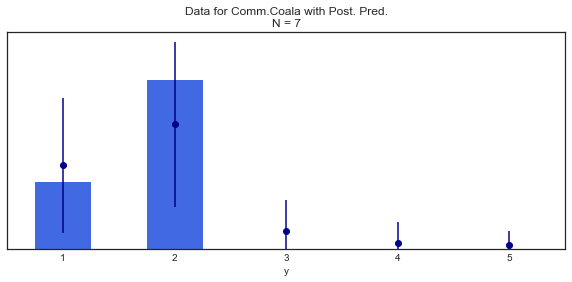

In [62]:
ppc_count_cdfs_inferencedata(t_v33,df2,'Comm.Coala','V33')

The image shows that the inferred distribution correctly models the data, but the HDI is wide for outcomes 1 and 2. The reason for this is our data contains only 7 participants from the Coala community. More data would reduce its width.

To illustrate the effect on the posterior predictive check of analyzing a community with higher participation, below we show the result for the Linux Kernel community. 

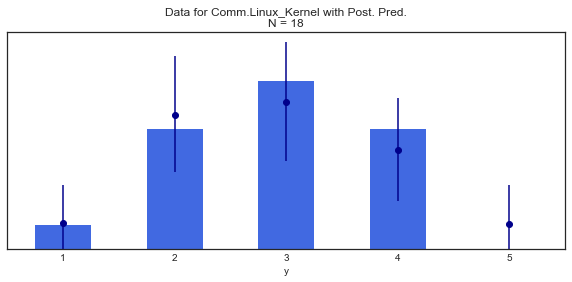

In [66]:
ppc_count_cdfs_inferencedata(t_v33,df2,'Comm.Linux_Kernel','V33')

Here we can see  that the HDI are all smaller than in for Coala, and the mode for each outcome very close to the height of the bars. Note that our dataset includes 18 participants from the Linux Kernel community.

We plot the posterior predictive check for all questions and communities in the [Appendix](#Appendix).

Now that we have increased our confidence on the accuracy of the inferred distribution, we proceed to analyse the results.

#### Mean distribution

We look at the mean distribution of the Coala communities for question V33. The mean describes the *central tendency* of the answers. Lenient communities will have the (some of) their mean distributions on the left hand side of the plots, specifically, with their density concentrated on values less than 3.


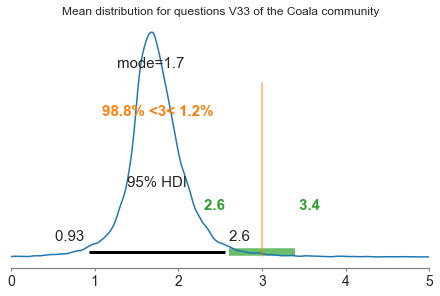

In [78]:
m_c_v33=np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Coala')]
s_c_v33=np.concatenate(t_v33.posterior['sigma'],axis=0)[:,comm_to_code(df2,'Comm.Coala')]
pm.plot_posterior(m_c_v33,ref_val=3,point_estimate='mode',hdi_prob=.95,rope=(2.6,3.4))
plt.xlim(0,5)
plt.title('Mean distribution for questions V33 of the Coala community')
plt.show()

This plot shows that 98.8% of the density is below 3, and the 95% HDI is completely below 3, specifically (0.93,2.6). In fact, we can consider a ROPE of size 0.8 (from 2.6 to 3.4) which still excludes the 95% HDI. These result indicates that **the Coala Community has a clear tendency towards a lenient governance style**.

In summary, we can conclude that **H5 is true**.

### H2: The Linux Kernel community adopts a protective style of governance for its code change process

To analyze this hypothesis we analyze the answers to questions V27-V30. In this case, we focus on the Linux Kernel community. Questions V27-V30 determine whether a community adopts a protective style of governance (see above). Concretely, we say a community that adopts a protective governance style if it is positive to any of the questions V27-V30.

#### Mean distributions

First we look at the mean distributions of the Linux Kernel communities for the question V27-V30. The mean describes the *central tendency* of the answers. Protective communities will have the (some of) their mean distributions on the left hand side of the plots, specifically, with their density concentrated on values less than 3.


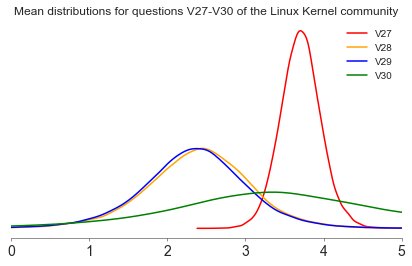

In [71]:
m_lk_v27=np.concatenate(t_v27.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]
m_lk_v28=np.concatenate(t_v28.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]
m_lk_v29=np.concatenate(t_v29.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]
m_lk_v30=np.concatenate(t_v30.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]


lk_traces = [m_lk_v27, m_lk_v28, m_lk_v29, m_lk_v30]
qs = ['V27','V28','V29','V30']
colors = ['red','orange','blue','green']

fig, ax1 = plt.subplots(figsize=(7,4))
[pm.plot_kde(t,label=q,ax=ax1,plot_kwargs={'color': c},bw='scott') for (t,q,c) in zip(lk_traces,qs,colors)]
ax1.set_xlim(0,5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(which='both', length=3, width=0.5)
ax1.set_yticks([])
plt.title('Mean distributions for questions V27-V30 of the Linux Kernel community')
plt.show()

Note that the distributions for V28 and V29 are clearly located in the interval [0,3]; thus suggesting that the Linux Kernel commnity adopts a protective governance style.

#### Min of mean distributions

To increase our confidence on the previous claim, here we plot the minimum of the mean distributions. This operation combines the distributions above and selects the minimum. Recall that $P(min(V_{27}, V_{28}, \ldots) \leq y)$ implies that at least one $V_i$ is smaller than $y$. This accurately matches our definition of protective governance style; i.e., _the community must be positive to at least one of questions V27-V30_.

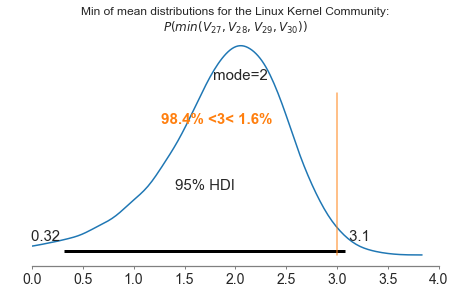

In [72]:
az.plot_posterior(np.array(lk_traces).min(axis=0),ref_val=3,point_estimate='mode',hdi_prob=.95,bw='scott')
plt.title('\nMin of mean distributions for the Linux Kernel Community: $P(min(V_{27},V_{28},V_{29},V_{30}))$')
plt.xlim(0,4)
plt.show()

This plot shows that 98% of the density is below 3, and the 95% HDI is within the interval [0,3). Here we cannot consider ROPEs of any size as the 95% HDI includes 3. These results indicate that **the Linux Kernel Community shows a clear tendency towards protective governance style**. However, the tendency is not radical, it is in fact steered to neutral answers. These results, together with the relatively large size of the HDI, might indicate that the community is experiencing a transition towards a less protective governance style (this is also observed in the mean distributions of questions V27 and V30).

In summary, we can conclude that **H2 is true**.

### H3: The Coala Community is more lenient than the Linux Kernel Community

To analyze this hypothesis we study the answers to question *V33: I never say no to a pull request/patch. I mentor the contributor to elevate his/her PR/patch to a mergeable state*. This is the only question necessary to determine whether a community is lenient (see above).

#### Mean distributions

First we look at the mean distributions of the Coala and Linux Kernel communities for the question V33. The mean describes the *central tendency* of the answers. If a community is more lenient than another, then its mean distribution should be located closer to the left hand side of the plots.

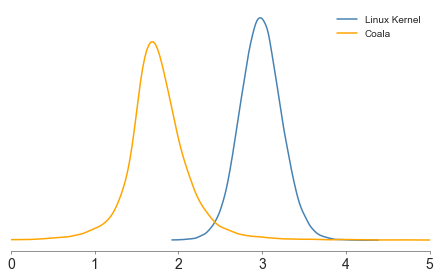

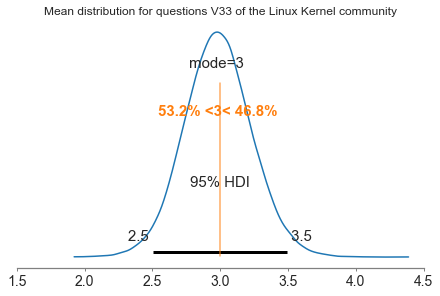

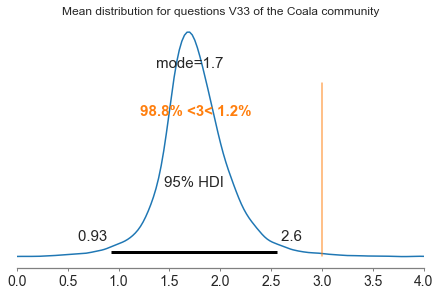

In [96]:
fig, ax1 = plt.subplots(figsize=(7.5,4.5))

[pm.plot_kde(np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,n)], 
                 plot_kwargs={'color': c}, cumulative=False,ax=ax1,
                 label=n.replace("Comm.","").replace("_"," "),bw='scott') 
      for (c,n) in zip(['steelblue','orange'],['Comm.Linux_Kernel','Comm.Coala'])]
ax1.set_xlim(0,5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(labeltop=False,labelbottom=True, which='major', length=3, width=0.5)
ax1.set_yticks([])


pm.plot_posterior(np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')],
                  ref_val=3,point_estimate='mode',hdi_prob=.95,bw='scott')
plt.xlim(1.5,4.5)
plt.title('Mean distribution for questions V33 of the Linux Kernel community')

pm.plot_posterior(np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Coala')],
                  ref_val=3,point_estimate='mode',hdi_prob=.95,bw='scott')
plt.xlim(0,4)
plt.title('Mean distribution for questions V33 of the Coala community')

plt.show()

The distribution of the Coala community clearly shows a more lenient tendency than the Linux Kernel. Though a small portion of the densities overlap in values close to 3, the HDI is clearly below 3---i.e., towards the "agree region" of the scale. On the contrary, the distribution of the Linux Kernel community has all its density concentrated in the interval (2.5,3.5)---in other words, the community's answers are mostly neutral.

Furthermore, we can look at the *difference* of the mean distributions and the *effect size*. When distributions are equal, both the difference of means and effect size are close to zero. In the presence of a difference, the difference of means and effect size distribuions shift towards left or right---depending on the values of the scale. 

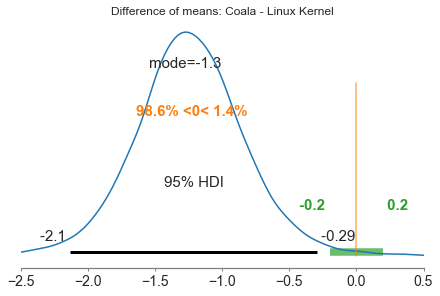

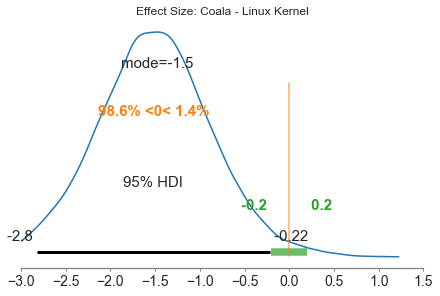

In [97]:
m_lk_v33=np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]
m_c_v33=np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Coala')]
s_lk_v33=np.concatenate(t_v33.posterior['sigma'],axis=0)[:,comm_to_code(df2,'Comm.Linux_Kernel')]
s_c_v33=np.concatenate(t_v33.posterior['sigma'],axis=0)[:,comm_to_code(df2,'Comm.Coala')]


pm.plot_posterior(m_c_v33-m_lk_v33,ref_val=0,rope=(-.2,.2),
                  point_estimate='mode',hdi_prob=.95,bw='scott')
plt.xlim(-2.5,0.5)
plt.title('Difference of means: Coala - Linux Kernel')


pm.plot_posterior((m_c_v33-m_lk_v33) / np.sqrt((s_lk_v33**2+s_c_v33**2)/2),
                  ref_val=0,rope=(-.2,.2),point_estimate='mode',
                  hdi_prob=.95,bw='scott')
plt.xlim(-3,1.5)
plt.title('Effect Size: Coala - Linux Kernel')


plt.show()

These plots also indicate the presence of differences between distributions of answers. Most of the density is located on negative part of the plot. Intuitively, this means that the mean of the answers of the Linux Kernel community are greater than those of the Coala community. Large answer values correspond to the "disagree region" of the scale. Thus, these plots indicate that the Coala community agrees more than the Linux Kernel community to the statement this question poses. In other words, the Coala community is more positive than the Linux Kernel community towards V33.

Note that we have highlighted a *Region Of Practical Equivalence* (ROPE) of (-0.2,0.2). This region marks what values that we consider equal to 0 in practice. The HDI of both the difference of means and the effect size are outside the ROPE. Hence, we can conclude that, **given a ROPE of (-0.2,0.2), there exists a difference between the distributions of the answers of the Coala and Linux Kernel communities**. We remark that more data may help reduce the HDI for both communities and allow us to enlarge the ROPE to further confirm this result.

In summary, we can conclude that **the Coala community is more lenient than the Linux Kernel community**. That is, the data suggests that **hypothesis H1 is true**.

### H4 & H5 The  FOSSASIA  community  adopts  an  equitable  style  of governance for its pull request process | The Odoo community adopts an equitable style of governance for its pull request process

To analyze these hypotheses we analyze the answers to questions V31-V32. In this case, we focus on the FOSSASIA and Odoo communities. Questions V31-V32 determine whether a community adopts a protective style of governance (see above). Concretely, we say a community that adopts a protective governance style if it is positive to any of the questions V31-V32.

We follow the same approach as for the leniency and protectiveness analyses we performed above.

#### Mean distributions

First we look at the mean distributions of both communities for question V31-V32. The mean describes the *central tendency* of the answers. Equitable communities will have the (some of) their mean distributions on the left hand side of the plots, specifically, with their density concentrated on values less than 3.


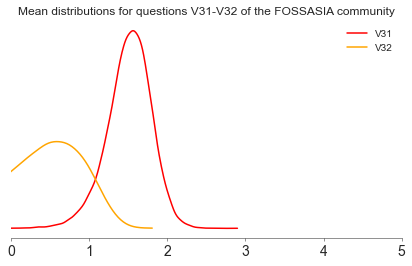

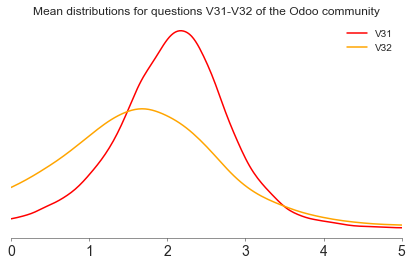

In [99]:
m_f_v31=np.concatenate(t_v31.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.FOSSASIA')]
m_f_v32=np.concatenate(t_v32.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.FOSSASIA')]
m_o_v31=np.concatenate(t_v31.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Odoo')]
m_o_v32=np.concatenate(t_v32.posterior['mu'],axis=0)[:,comm_to_code(df2,'Comm.Odoo')]


f_traces = [m_f_v31, m_f_v32]
o_traces = [m_o_v31, m_o_v32]
qs = ['V31','V32']
colors = ['red','orange']


fig, ax1 = plt.subplots(figsize=(7,4))
[pm.plot_kde(t,label=q,ax=ax1,plot_kwargs={'color': c},
             bw='scott') for (t,q,c) in zip(f_traces,qs,colors)]
ax1.set_xlim(0,5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(which='both', length=3, width=0.5)
ax1.set_yticks([])
plt.title('Mean distributions for questions V31-V32 of the FOSSASIA community')
plt.show()


fig, ax1 = plt.subplots(figsize=(7,4))
[pm.plot_kde(t,label=q,ax=ax1,plot_kwargs={'color': c},
             bw='scott') for (t,q,c) in zip(o_traces,qs,colors)]
ax1.set_xlim(0,5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(which='both', length=3, width=0.5)
ax1.set_yticks([])
plt.title('Mean distributions for questions V31-V32 of the Odoo community')

plt.show()

These plots indicate that the FOSSASIA community clearly follows an equitable governance style. The density of both distributions (V31 and V32) is well in the interval (0,3); in fact, the mean of the distributions are less than 2. Similarly, most of the density of the  distibutions for the Odoo community are located in (0,3), but in this case the there is non-negligeable part of the density located in area greater than 3.

To better analyze these results we look at the min of the distributions.

#### Min of mean distributions

To increase our confidence on the previous claim, here we plot the minimum of the mean distributions. This operation combines the distributions above and selects the minimum. Recall that $P(min(V_{31}, V_{32}) \leq y)$ implies that at least one $V_i$ is smaller than $y$. This accurately matches our definition of equitable governance style; i.e., _the community must be positive to at least one of questions V31-V32_.

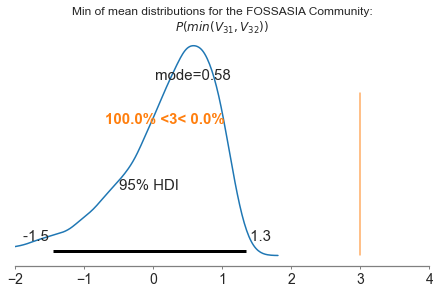

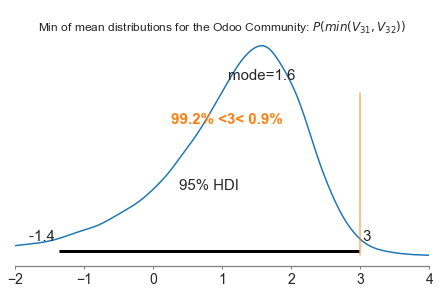

In [101]:
az.plot_posterior(np.array(f_traces).min(axis=0),ref_val=3,point_estimate='mode',
                  hdi_prob=.95,bw='scott')
plt.title('\nMin of mean distributions for the FOSSASIA Community: $P(min(V_{31},V_{32}))$')
plt.xlim(-2,4)
plt.show()

az.plot_posterior(np.array(o_traces).min(axis=0),ref_val=3,point_estimate='mode',
                  hdi_prob=.95,bw='scott')
plt.title('\nMin of mean distributions for the Odoo Community: $P(min(V_{31},V_{32}))$')
plt.xlim(-2,4)
plt.show()

As expected,  **the plot for the FOSSASIA community cleary indicates that the community follows an equitable governance style**. The 95% HDI is well below 3, in fact the right limit is 1.3.
Likewise the result for **the Odoo community indicates that it also follows an equitable governance style**; the 95% HDI is also below 4. However, in this case, the results are more widespread than for the FOSSASIA community. The right limit of the 95% HDI interval is 2.9; indicating that there are some participants that lean towards neutral answers.
As for the Linux Kernel community, this effect may be explained by a transitining phase towards a more equitable governance style.

In summary, we can conclude that **H3 and H4 are true**.

### H6: Each of the 15 FOSS communities adopts a governance style, either protective, equitable or lenient, for its pull request process

Analysing this hypothesis involves looking into all questions (V27-V33) and all communities. We characterize the level of protectiness, equitability and leniency among communities. We look at the hypothesis from two different perspectives: 

1. Compare absolute levels of governance style for each community. 
    * **We check whether communities are protective, equitable and lenient.**
2. Compare relative levels of governance style for each community.
    * **We check how protective, equitable and lenient communities are.**

#### Absolute level of governance

First we look into at the probability of the different communities being protective, equitable and lenient. As we have defined in the sections above this corresponds to the cumulative density of the distributions $P(\min(V_{27},V_{28},V_{29},V_{30})<3)$, $P(\min(V_{31},V_{32})<3)$ and $P(V_{33}<3)$, respectively.

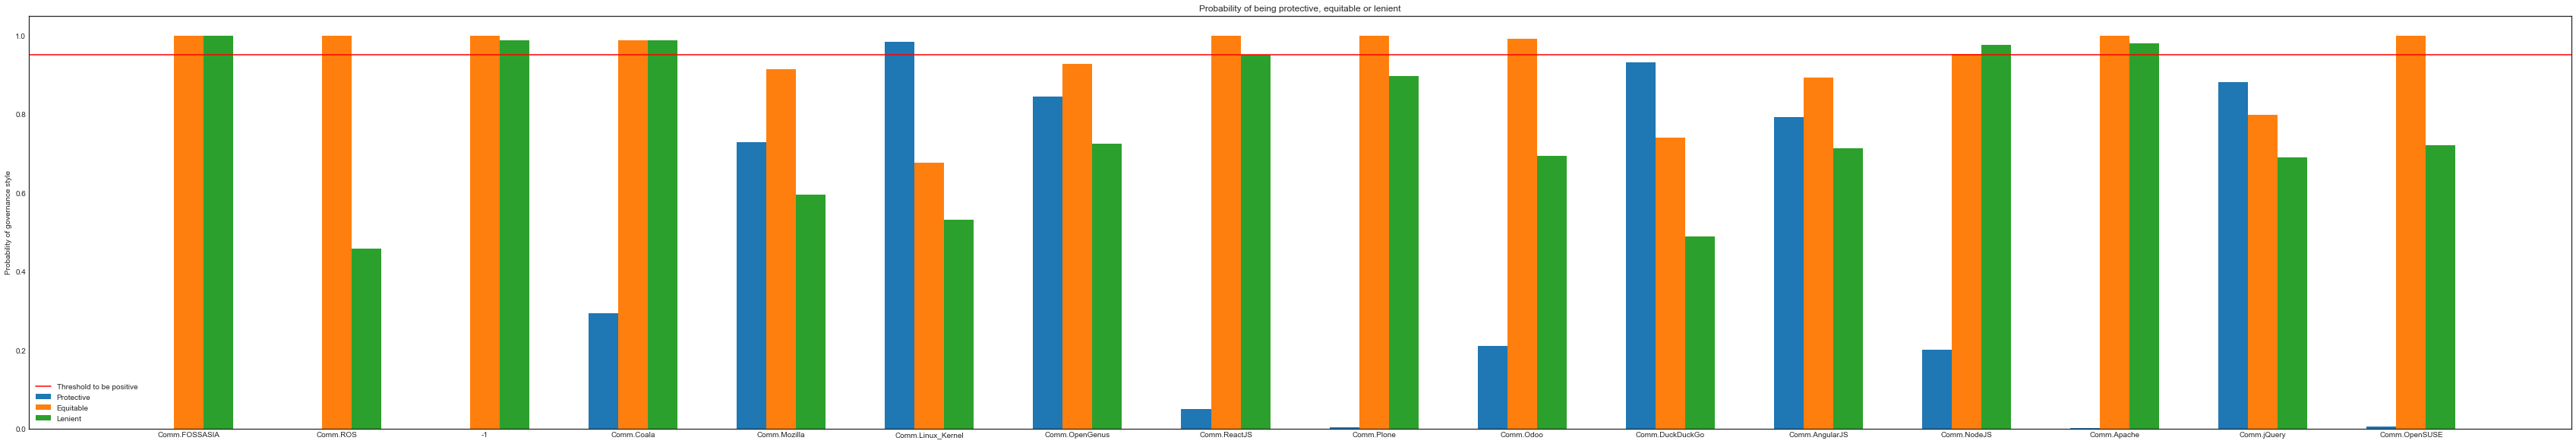

In [107]:
## If using saved .netcdf traces
communities = df2.Community.unique()
    
def get_results(c):
    m_c_v27=np.concatenate(t_v27.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v28=np.concatenate(t_v28.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v29=np.concatenate(t_v29.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v30=np.concatenate(t_v30.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v31=np.concatenate(t_v31.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v32=np.concatenate(t_v32.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v33=np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]

    c_prote=[m_c_v27,m_c_v28,m_c_v29,m_c_v30]
    c_equit=[m_c_v31,m_c_v32]
    c_lenie=[m_c_v33]
    
    return np.array([np.mean(np.array(c_prote).min(axis=0) < 3),
                    np.mean(np.array(c_equit).min(axis=0) < 3),
                    np.mean(np.array(c_lenie).min(axis=0) < 3)])
    
v_results = np.array([get_results(c) for c in communities])
    
labels = communities
protective = v_results[:,0]
equitable = v_results[:,1]
lenient = v_results[:,2]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(60,10))
rects1 = ax.bar(x - .2, protective, width, label='Protective')
rects2 = ax.bar(x + 0, equitable, width, label='Equitable')
rects3 = ax.bar(x + .2, lenient, width, label='Lenient')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability of governance style')
ax.set_title('Probability of being protective, equitable or lenient')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axhline(y=.95,color='red',label='Threshold to be positive')
ax.legend()
plt.show()

The figure above shows the cumulative density for each governance style for each community. The red line marks 95%. We consider that a community is positive towards a governance style if more than 95% of the (cumulative density of the) answers are above 3. Note that this differs from the definitions in the plots above where we checked that the 95% HDI is below 3. Nevertheless, this approximation is useful in evaluating H6. Also, note that this choice does not affect the correcteness of our conclusions as they are not dependent on it; the red line serves as a visual aid for intuition.

All in all, this graph clearly rejects the hypothesis, as there are some communities that follow more than one governance style, and others that show none.

#### Relative level of governance

Here we provide another perspective to evaluating H6. Instead of focusing on the absolute governance values in each community, we focus on relative values. Specifically, we quantify _how_ protective, equitable and lenient communities are, as opposed whether communities _are_ protective, equitable and lenient.

To this end, we normalize the results in the bar plot above. For instance, the FOSASSIA community above, is equally equitable and lenient and not protective. So we say that it is $0\%$ protective, $50\%$ equitable and $50\%$ lenient. For the ROS community we see that it is roughly twice as equitable than lenient and also not protective; thus we say that it is $0\%$ protective, $75\%$ equitable and $25\%$ lenient. We normalize the values of governance style in this manner for all communities.

First we create an auxiliary function to easily access the distributions $P(\min(V_{27},V_{28},V_{29},V_{30}))$, $P(\min(V_{31},V_{32}))$ and $P(V_{33})$ for each community. We use this distributions later for the plots.

In [103]:
def get_mins(c):
    m_c_v27=np.concatenate(t_v27.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v28=np.concatenate(t_v28.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v29=np.concatenate(t_v29.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v30=np.concatenate(t_v30.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v31=np.concatenate(t_v31.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v32=np.concatenate(t_v32.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]
    m_c_v33=np.concatenate(t_v33.posterior['mu'],axis=0)[:,comm_to_code(df2,c)]

    c_prote=[m_c_v27,m_c_v28,m_c_v29,m_c_v30]
    c_equit=[m_c_v31,m_c_v32]
    c_lenie=[m_c_v33]
    
    return (np.array([np.array(c_prote).min(axis=0),
                     np.array(c_equit).min(axis=0),
                     np.array(c_lenie).min(axis=0)]),c)
    
v_mins = np.array([get_mins(c) for c in communities])

<ipython-input-103-8d484c01a97f>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v_mins = np.array([get_mins(c) for c in communities])


#### Ternay plot of governance styles

Here we use a ternary plot to visually compare how protective, equitable and lenient the different communities are. It is easy to see that most communities have a 50/50 level of equitability and leniency. This is depicted by the cluster of communities located in the middle of the left edge of the triangle. Communities that are located at that edge, are not protective. The closer communities are to the protective vertex the more protective they are. Note that the communities are located close to the altitude of the protective vertex, meaning that they keep a level of equitability and leniency close to 50/50 in general.

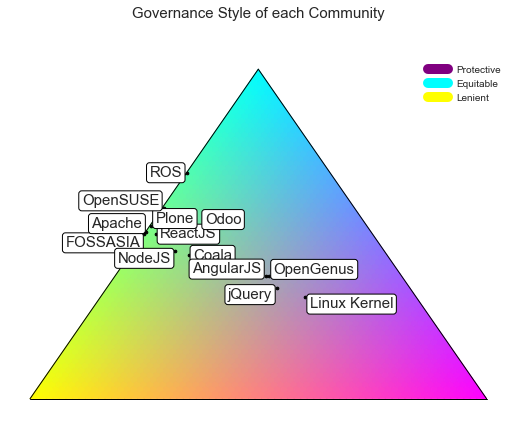

In [104]:
import ternary
import math
from matplotlib.lines import Line2D

## Boundary and Gridlines
scale = 70
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(9, 7)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1)

# Set Axis labels and Title
fontsize = 15
tax.set_title("Governance Style of each Community\n\n", fontsize=fontsize)

def color_point(x, y, z, scale):
    w = 255
    x_color = x * w / float(scale)
    y_color = y * w / float(scale)
    z_color = z * w / float(scale)
    r = math.fabs(w - y_color) / w
    g = math.fabs(w - x_color) / w
    b = math.fabs(w - z_color) / w
    return (r, g, b, 1.)

def generate_heatmap_data(scale=1):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d

points = [np.array([np.mean(v_mins[i][0][0] < 3),
                    np.mean(v_mins[i][0][1] < 3),
                    np.mean(v_mins[i][0][2] < 3)]) for i in range(0,16)]
ps = [[p[0]*scale/p.sum(),p[1]*scale/p.sum(),p[2]*scale/p.sum()] for p in points]

for p,c,y in zip(ps,df2.Community.unique(),np.linspace(64,0,16)):
    if ("DuckDuckGo" in c) or ("Mozilla" in c) or ("JQuery" in c) or ("-1" in c):
        continue
        
    tax.scatter([p], marker='o', s=7, zorder=3, c='black', label=c.replace('Comm.',''))
    
    xshift=-0.7
    yshift=0
    ha='right'
    va='center'
    if ("Plone" in c) or ("Coala" in c) or ("ReactJS" in c) or ("OpenGenus" in c) or ("Linux_Kernel" in c) or ("Odoo" in c):
        ha='left'
        xshift=-xshift
    if ("FOSSASIA" in c):
        va='top'
        xshift=-0.4
        yshift=-0.4
    if ("Apache" in c) or ("AngularJS" in c) or ("OpenGenus" in c) or ("Plone" in c) or ("OpenSUSE" in c) or ("Odoo" in c):
        va='bottom'
    if ("Apache" in c):
        yshift=0.4
    if ("Linux_Kernel" in c) or ("jQuery" in c) or ("NodeJS" in c):
        va='top'
            
    
    tax.annotate(c.replace('Comm.','').replace('-1','Others').replace('_',' '),
                 (p[0]+xshift,p[1]+yshift,p[2]),
                 fontsize=15,
                 ha=ha,va=va,
                 bbox=dict(boxstyle="round", fc="w", pad=0.2))
    

tax.heatmap(generate_heatmap_data(scale), style="hexagonal", use_rgba=True, colorbar=False)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

legend_elem=[Line2D([0], [0], marker='o', color='purple', alpha=1, label='Protective', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='cyan', alpha=1, label='Equitable', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='yellow', alpha=1, label='Lenient',linewidth=10, markerfacecolor='g', markersize=0),
            ]
tax.legend(handles=legend_elem,loc='upper right')
ternary.plt.show()

In order for H6 to hold we should observe clusters of communities in the corners of the triangle. Instead, in the ternay plot above, we can observe that this is not the case, again confirming that H6 does not hold. All communities located in the middle of the right edge (and along the altitude of the protective vertex) are equally equitable and lenient.

At this point, one might wonder whether we set the right boundaries to determine what is means for a community to be protective, equitable and lenient. A visual inspection of the ternay plot above, shows that most of the triangle is empty. Meaning that our definition for each governance style does not fit the data very well.

To address this issue, below we rescale the results by taking the minimum level of equitability and leniency as a definition for lack of  equitability and leniency. Thus, using the collected data to better define what it means for communities under study to follow a governance style.

### Rescaled ternary plot

Here we rescale the ternary plot from the section above by taking the minimum value of equitability and leniency as the new definition of lack of equitability and leniency. This scaling aims at better characterizing governance styles for the communities under study. (As shown in the ternay plot above, most the communities are clustered in a small part of the triangle). This scaling can be seen as a "zoom in" in the cluster of communities. 

Concrete, we simply take 67% as the minimum level of equitability and 45% the minimum level of leniency. These correspond to the minimum levels of equitability and leniency observed in the data.

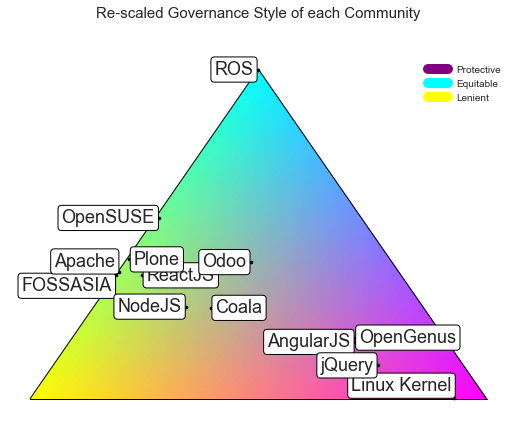

In [105]:
## Boundary and Gridlines
scale = 70
figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(9, 7)

# Draw Boundary and Gridlines
tax.boundary(linewidth=1)

# Set Axis labels and Title
fontsize = 15
tax.set_title("Re-scaled Governance Style of each Community\n\n", fontsize=fontsize)

rescaled_points = [np.array([np.mean(v_mins[i][0][0] < 3),
                   np.mean(v_mins[i][0][1] < 3)-.67375,
                   np.mean(v_mins[i][0][2] < 3)-.45775]) for i in range(0,16)]
nor_points = [[p[0]/p.sum(),p[1]/p.sum(),p[2]/p.sum()] for p in rescaled_points]
ps = [[p[0]*scale,p[1]*scale,p[2]*scale] for p in nor_points]

for p,c,y in zip(ps,df2.Community.unique(),np.linspace(64,0,16)):
    if ("DuckDuckGo" in c) or ("Mozilla" in c) or ("JQuery" in c) or ("-1" in c):
        continue
        
    tax.scatter([p], marker='o', s=7, zorder=3, c='black', label=c.replace('Comm.',''))

    xshift=-0.7
    yshift=0
    ha='right'
    va='center'
    if ("Plone" in c) or ("Coala" in c) or ("ReactJS" in c) or ("OpenGenus" in c):
        ha='left'
        xshift=-xshift
    if ("FOSSASIA" in c):
        va='top'
        xshift=-0.4
        yshift=-0.4
    if ("Apache" in c):
        va='bottom'
        yshift=0.4
    if ("Linux_Kernel" in c):
        va='bottom'
        yshift=0.7
            
    
    tax.annotate(c.replace('Comm.','').replace('-1','Others').replace('_',' '),
                 (p[0]+xshift,p[1]+yshift,p[2]),
                 fontsize=18,
                 ha=ha,va=va,
                 bbox=dict(boxstyle="round", fc="white", pad=0.2))
    

tax.heatmap(generate_heatmap_data(scale), style="hexagonal", use_rgba=True, colorbar=False)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

legend_elem=[Line2D([0], [0], marker='o', color='purple', alpha=1, label='Protective', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='cyan', alpha=1, label='Equitable', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='yellow', alpha=1, label='Lenient',linewidth=10, markerfacecolor='g', markersize=0),
            ]
tax.legend(handles=legend_elem,loc='upper right')
ternary.plt.show()

The plot above shows that the rescaling better characterizes the governance style of the communities under study. We observe that ROS and Linux Kernel become only equitable and protective, respectively. However, the rest of communities are still located in the middle of the right edge and along the altitude of the protective vertex, meaning that they are close to 50/50 equitable and lenient. Once more, confirming that H6 is false.

### Summary of H6 Analysis

We have analyze H6 through two different perspectives: absolute (checking whether communities are protective, equitable or lenient), and relative (how protective, equitable and lenient communities are). We have also rescaled the definition of equitability and leniency after observaing that our original definitions resulted in having all communities located ina reduced part of the spectrum (of governance styles). Thus, providing a better tailored classification for these communities.

In all these perspectives we observe that most communities exhibit more than one governance style. Thus, **we conclude that H6 is false**.

# Appendix

## 2-dimensional comparison of governance styles

These plots compare the communities in pairs of two governance styles.

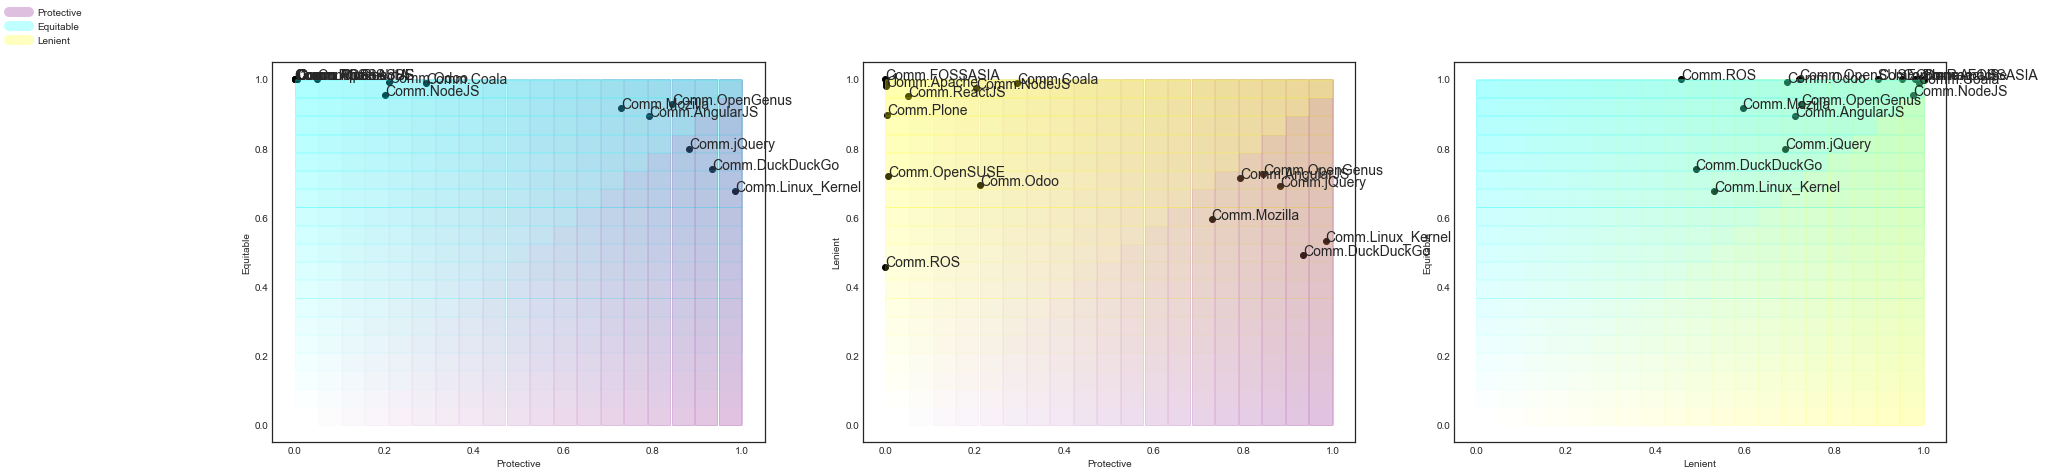

In [111]:
from matplotlib.patches import Rectangle

fig, axs = plt.subplots(figsize=(30,7),nrows=1, ncols=3, constrained_layout=False)

points_cdf = [(np.mean(v_mins[i][0][0] < 3),
               np.mean(v_mins[i][0][1] < 3),
               np.mean(v_mins[i][0][2] < 3)) for i in range(0,16)]

axs[0].set_xlabel("Protective")
axs[0].set_ylabel("Equitable")

axs[1].set_xlabel("Protective")
axs[1].set_ylabel("Lenient")


axs[2].set_xlabel("Lenient")
axs[2].set_ylabel("Equitable")

for p,c in zip(points_cdf,df2.Community.unique()):
    axs[0].scatter(p[0],p[1],label=c.replace('Comm.',''),c='black')
    axs[0].annotate(c, (p[0], p[1]),fontsize=14)
    axs[1].scatter(p[0],p[2],label=c.replace('Comm.',''),c='black')
    axs[1].annotate(c, (p[0], p[2]),fontsize=14)
    axs[2].scatter(p[2],p[1],label=c.replace('Comm.',''),c='black')
    axs[2].annotate(c, (p[2], p[1]),fontsize=14)

for i in np.linspace(0,1,20):    
    axs[0].add_patch(Rectangle(xy=(i, 0), 
                               width=0.05 if i!=1 else 0, height=1, 
                               linewidth=1, color='purple', 
                               fill=True, alpha=i/4))
    axs[0].add_patch(Rectangle(xy=(0, i),
                               width=1, height=0.05 if i!=1 else 0, 
                               linewidth=1, color='cyan', 
                               fill=True, alpha=i/3))
    
    axs[1].add_patch(Rectangle(xy=(i, 0), 
                               width=0.05 if i!=1 else 0, height=1, 
                               linewidth=1, color='purple', 
                               fill=True, alpha=i/4))
    axs[1].add_patch(Rectangle(xy=(0, i),
                               width=1, height=0.05 if i!=1 else 0, 
                               linewidth=1, color='yellow', 
                               fill=True, alpha=i/3))

    axs[2].add_patch(Rectangle(xy=(i, 0), 
                               width=0.05 if i!=1 else 0, height=1, 
                               linewidth=1, color='yellow', 
                               fill=True, alpha=i/4))
    axs[2].add_patch(Rectangle(xy=(0, i),
                               width=1, height=0.05 if i!=1 else 0, 
                               linewidth=1, color='cyan', 
                               fill=True, alpha=i/3))

legend_elem=[Line2D([0], [0], marker='o', color='purple', alpha=.25, label='Protective', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='cyan', alpha=.25, label='Equitable', linewidth=10, markerfacecolor='g', markersize=0),
             Line2D([0], [0], marker='o', color='yellow', alpha=.25, label='Lenient',linewidth=10, markerfacecolor='g', markersize=0),
            ]
fig.legend(handles=legend_elem,loc='upper left')
plt.show()

### 3D plot comparing all answers

This plot compares all communities in a single 3 dimensional figure. Note that 3 dimensions are enought to include all governance styles.

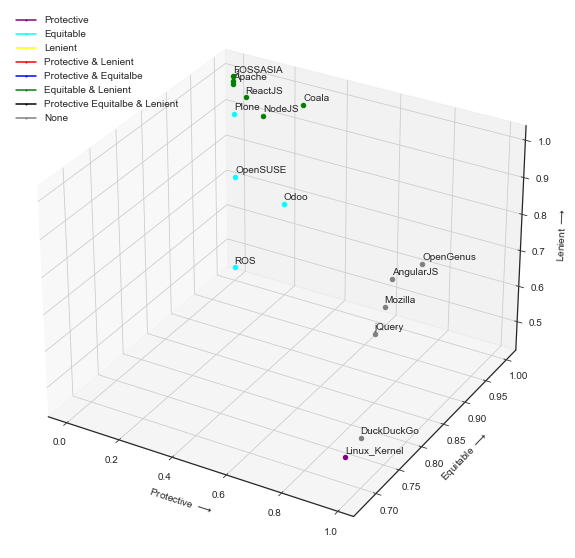

In [112]:
from matplotlib.lines import Line2D  

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")



colours = ['purple','yellow','cyan','red','blue','green','black']


def color_cat(v_mins,c_idx):
    p=np.mean(v_mins[c_idx][0][0]<3)
    e=np.mean(v_mins[c_idx][0][1]<3)
    l=np.mean(v_mins[c_idx][0][2]<3)
    if p>.95 and e>.95 and l>.95:
        return 'black'
    elif p>.95 and e>.95:
        return 'blue'
    elif p>.95 and l>.95:
        return 'red'
    elif e>.95 and l>.95:
        return 'green'
    elif p>.95:
        return 'purple'
    elif e>.95:
        return 'cyan'
    elif l>.95:
        return 'yellow'
    else:
        return 'gray'


for i in range(0,16):
    p=np.mean(v_mins[i][0][0]<3)
    e=np.mean(v_mins[i][0][1]<3)
    l=np.mean(v_mins[i][0][2]<3)
    ax.scatter3D(p,e,l, marker='o', color=color_cat(v_mins,i))    
    ax.text(p,e,l+.01,'%s' % (str(v_mins[i][1]).replace('Comm.','')),size=10,zorder=2) 

X=[np.mean(v_mins[i][0][0]<3) for i in range(0,16)]
Y=[np.mean(v_mins[i][0][1]<3) for i in range(0,16)]
Z=[np.mean(v_mins[i][0][2]<3) for i in range(0,16)]
  
ax.set_xlabel('Protective $\longrightarrow$')
ax.set_ylabel('Equitable $\longrightarrow$')
ax.set_zlabel('Lenient $\longrightarrow$')

legend_elem=[Line2D([0], [0], marker='o', color='purple', label='Protective',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='cyan', label='Equitable',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='yellow', label='Lenient',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='red', label='Protective & Lenient',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='blue', label='Protective & Equitalbe',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='green', label='Equitable & Lenient',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='black', label='Protective Equitalbe & Lenient',markerfacecolor='g', markersize=1),
             Line2D([0], [0], marker='o', color='gray', label='None',markerfacecolor='g', markersize=1),
            ]
ax.legend(handles=legend_elem,loc='upper left')
plt.savefig('3dplot.png',dpi=300)
plt.show()

## Posterior Predictive Checks and Trace Diagnosis

Below we plot the posterior predictive checks and trace diagnosis for all questions and communities. The posterior predictive checks aim to show that the inferred distributions accurately model the data. The trace diagnosis plot metrics such as MCSE, $\hat{R}$ and ESS. The MCSE should be close to 0, and $\hat{R}$ close to 1.0. For ESS there is bound; the larger the better. However, a rule of thumb is that ESS values close to 10000 indicate good estimation [Kruschke 2015].

### Question V27

#### Posterior Predictive Check V27

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


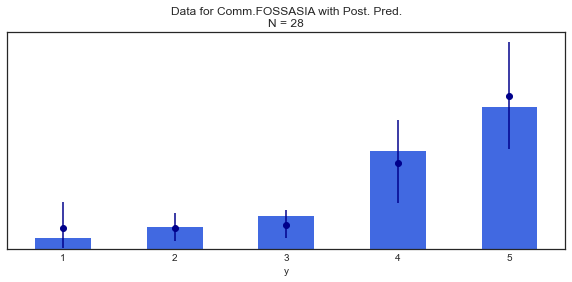

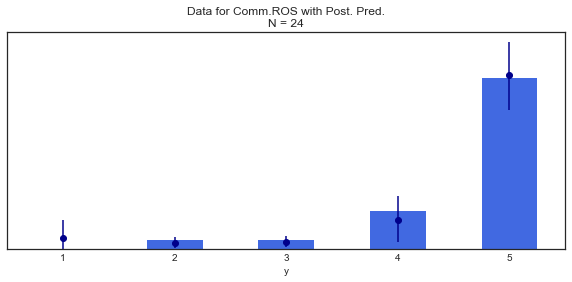

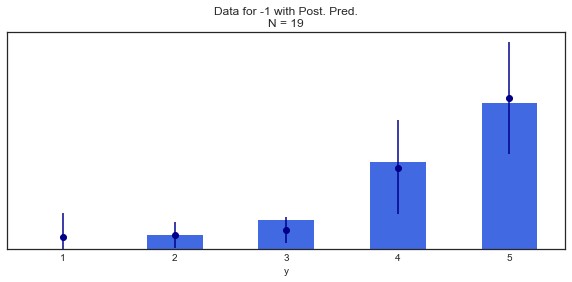

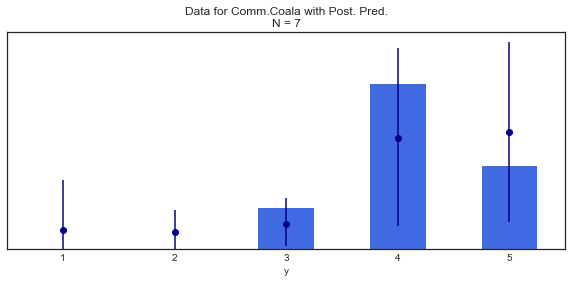

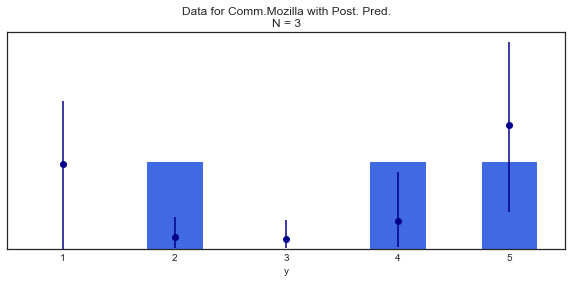

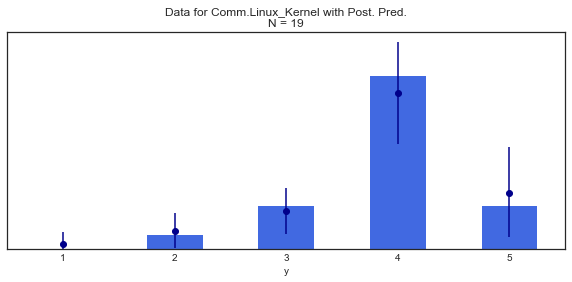

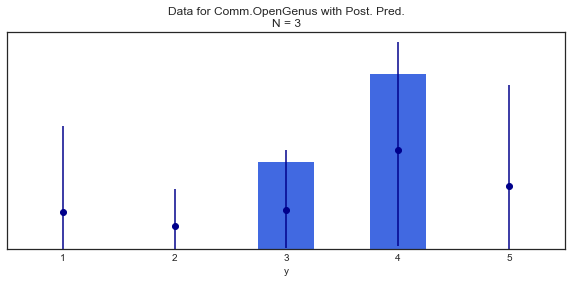

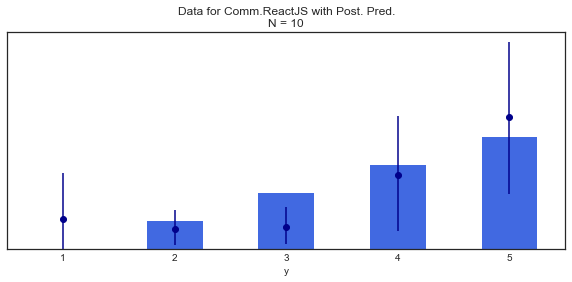

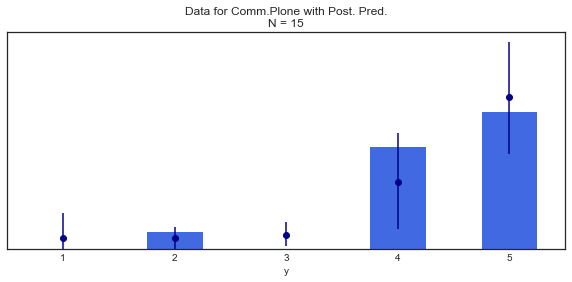

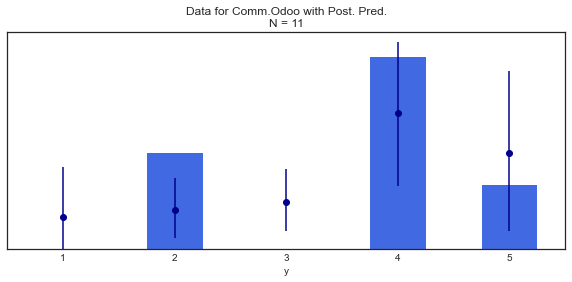

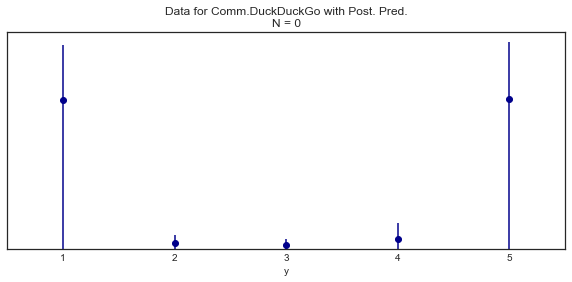

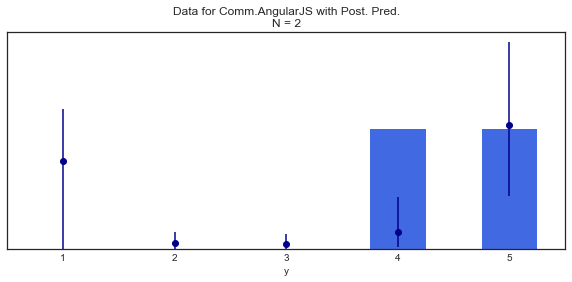

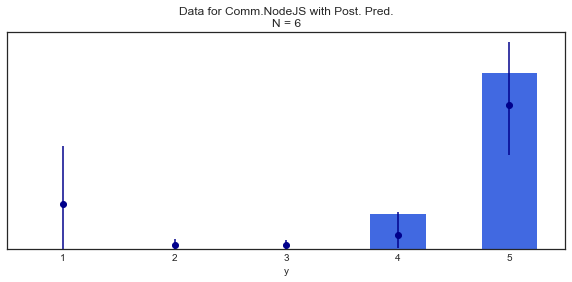

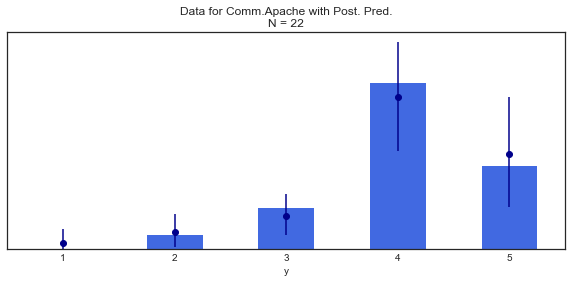

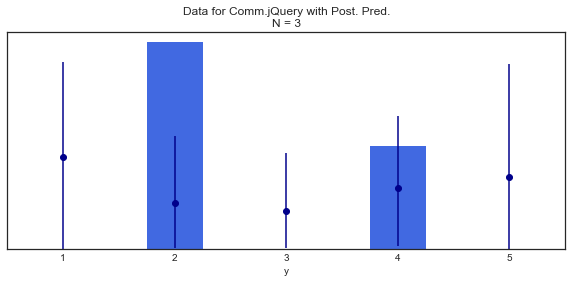

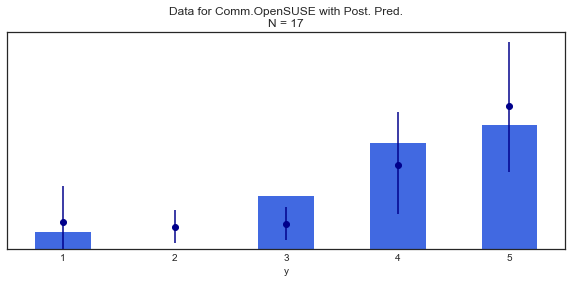

In [113]:
[ppc_count_cdfs_inferencedata(t_v27,df2,c,'V27') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V27

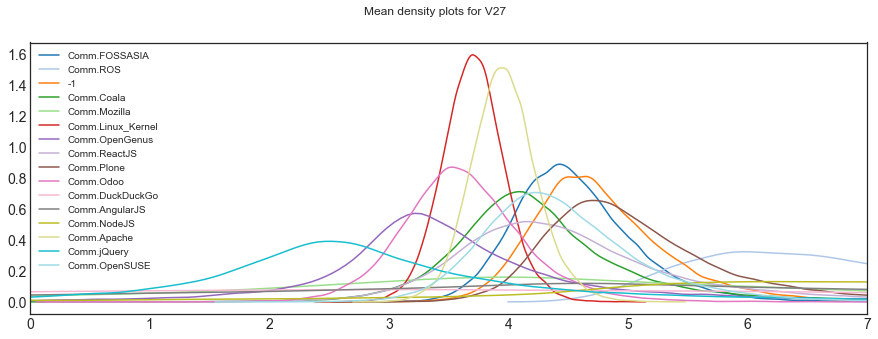

In [114]:
mean_densities_inferencedata(t_v27,'V27')

#### Trace diagnosis V27

In [115]:
pm.summary(t_v27)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.337,0.173,2.028,2.675,0.002,0.001,8141.0,8077.0,8225.0,12851.0,1.0
theta_missing[1],2.967,0.159,2.676,3.273,0.002,0.001,7222.0,7156.0,7213.0,11056.0,1.0
mu[0],4.787,0.613,3.754,5.945,0.004,0.003,19271.0,18104.0,22403.0,18438.0,1.0
mu[1],4.411,4.246,-3.822,12.638,0.025,0.021,29757.0,21075.0,29635.0,23210.0,1.0
mu[2],3.966,0.280,3.449,4.508,0.002,0.001,23728.0,22910.0,24702.0,19433.0,1.0
mu[3],4.302,0.967,2.795,6.094,0.011,0.009,7991.0,6020.0,15461.0,8165.0,1.0
mu[4],3.116,4.952,-6.200,12.339,0.028,0.025,30604.0,19312.0,30585.0,23403.0,1.0
mu[5],4.558,0.519,3.627,5.530,0.004,0.003,14336.0,13109.0,17068.0,13518.0,1.0
mu[6],3.705,0.262,3.202,4.192,0.002,0.001,20399.0,20120.0,20591.0,20138.0,1.0
mu[7],4.386,3.351,-1.839,11.456,0.021,0.019,25398.0,15911.0,26429.0,17982.0,1.0


### Question V28

#### Posterior Predictive Check V28

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


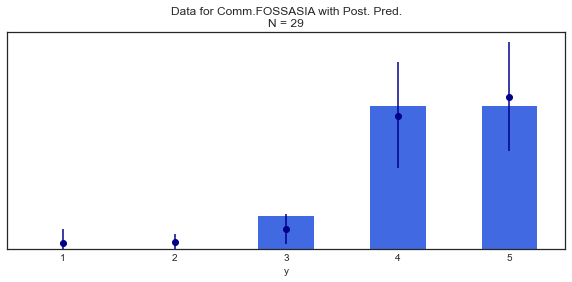

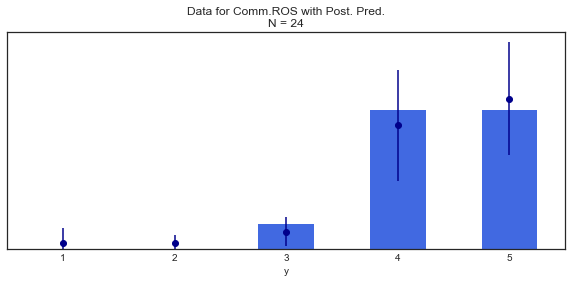

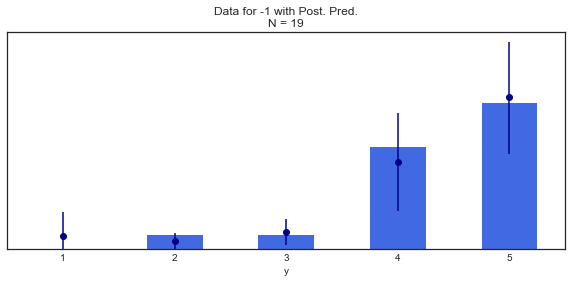

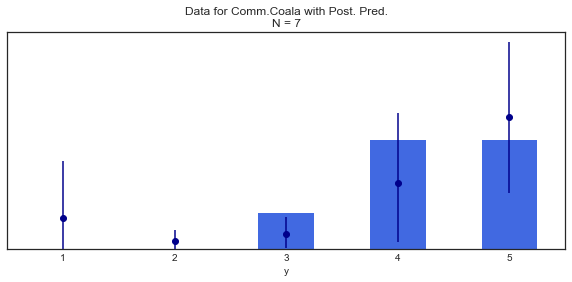

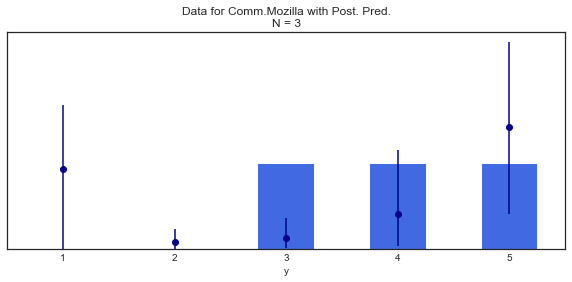

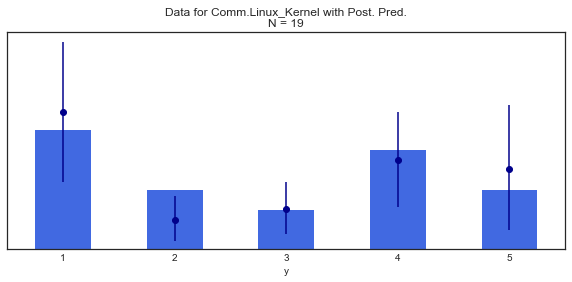

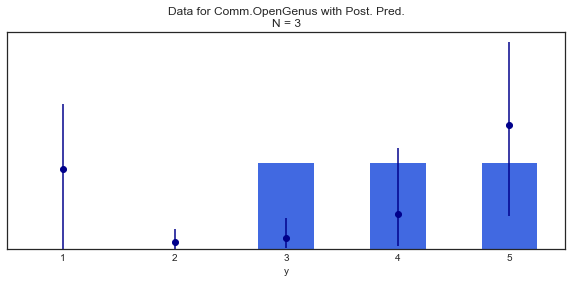

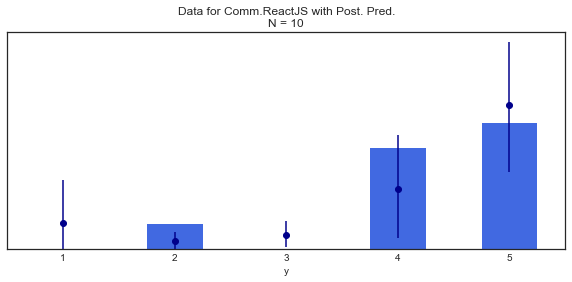

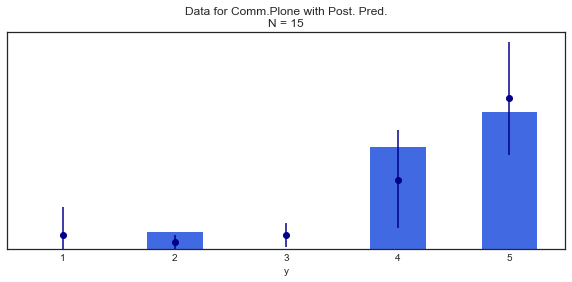

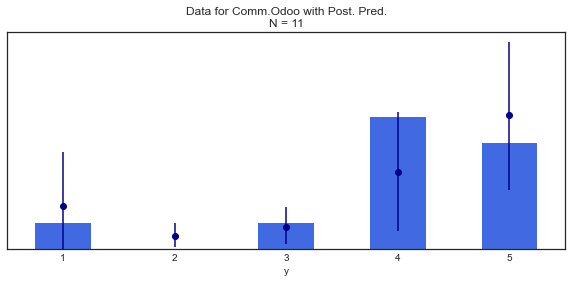

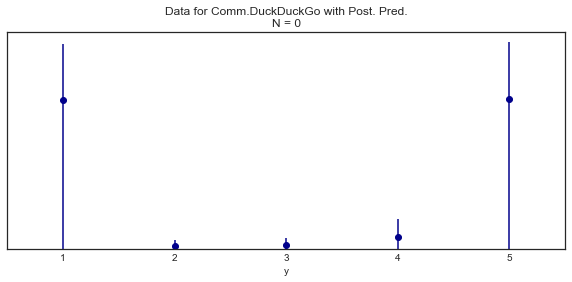

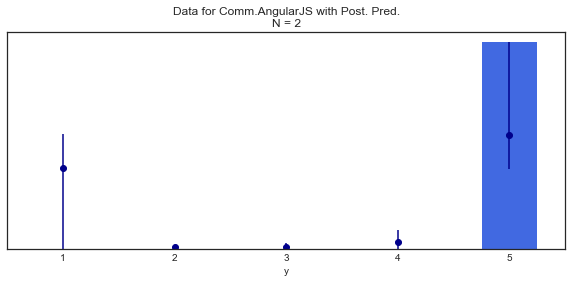

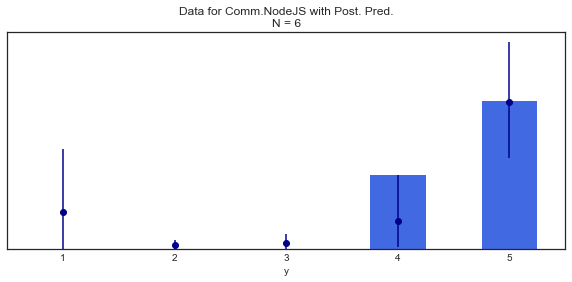

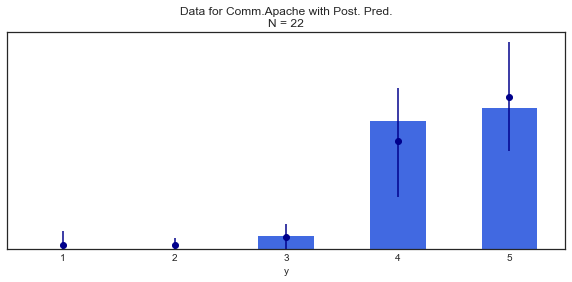

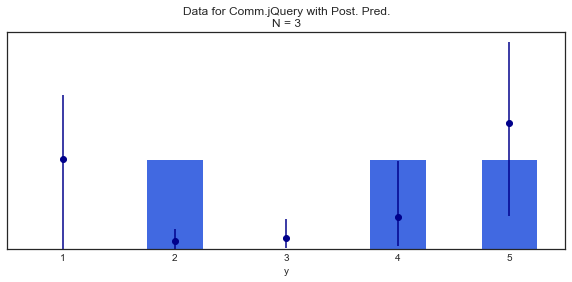

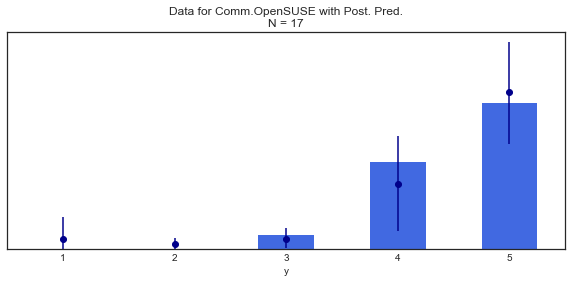

In [116]:
[ppc_count_cdfs_inferencedata(t_v28,df2,c,'V28') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V28

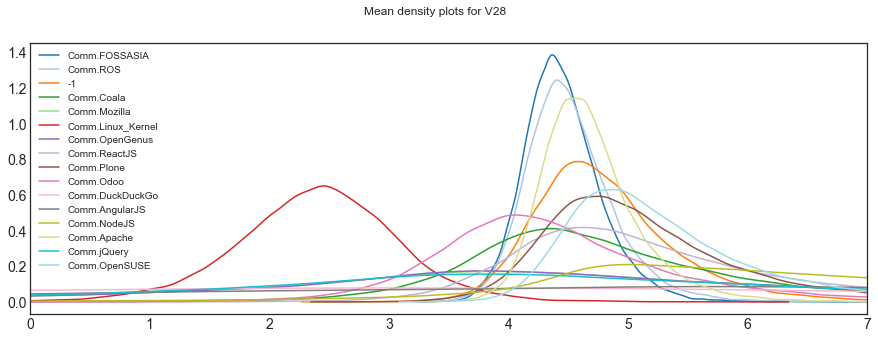

In [117]:
mean_densities_inferencedata(t_v28,'V28')

#### Trace diagnosis V28

In [118]:
pm.summary(t_v28)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.030,0.164,1.732,2.338,0.002,0.001,11884.0,11774.0,12176.0,18268.0,1.0
theta_missing[1],2.721,0.184,2.375,3.066,0.002,0.001,9046.0,8977.0,9072.0,14526.0,1.0
mu[0],4.812,0.629,3.759,6.020,0.004,0.003,20707.0,19414.0,23992.0,19716.0,1.0
mu[1],5.104,4.831,-3.980,14.183,0.030,0.023,26803.0,22591.0,26696.0,25338.0,1.0
mu[2],4.688,0.428,3.981,5.530,0.004,0.003,12746.0,11865.0,16372.0,12284.0,1.0
mu[3],5.010,1.667,2.477,8.492,0.017,0.014,9462.0,7557.0,14403.0,9343.0,1.0
mu[4],3.089,5.015,-6.357,12.495,0.029,0.026,29453.0,18965.0,29470.0,22637.0,1.0
mu[5],4.451,0.331,3.852,5.085,0.003,0.002,15991.0,14820.0,19343.0,13811.0,1.0
mu[6],2.383,0.698,1.065,3.736,0.004,0.003,27713.0,25267.0,27986.0,21562.0,1.0
mu[7],4.458,3.321,-1.947,11.348,0.022,0.019,22904.0,15417.0,24110.0,17337.0,1.0


### Question V29

#### Posterior Predictive Check V29

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


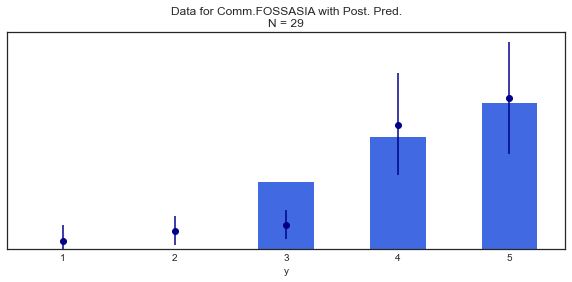

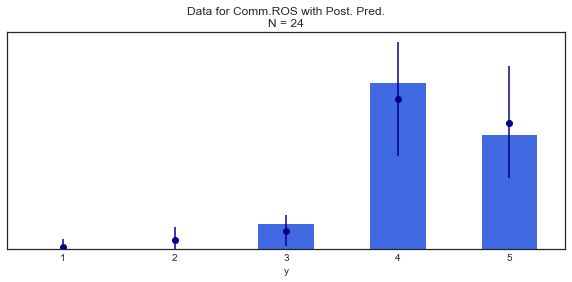

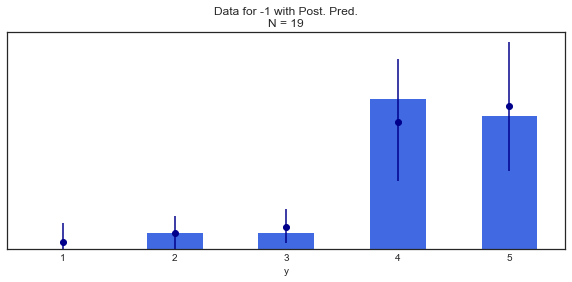

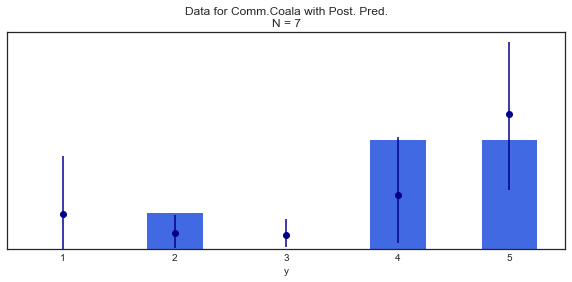

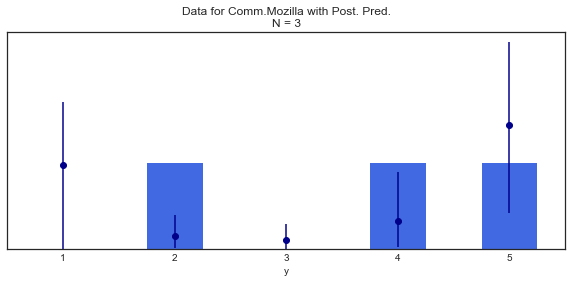

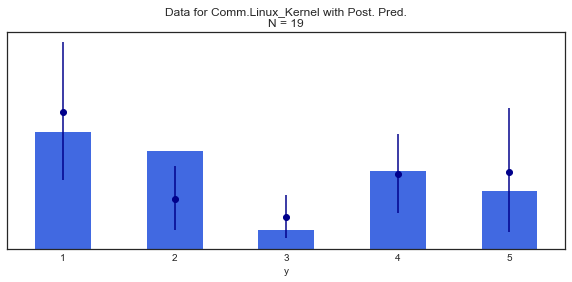

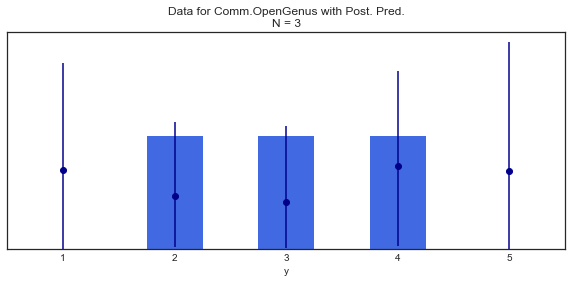

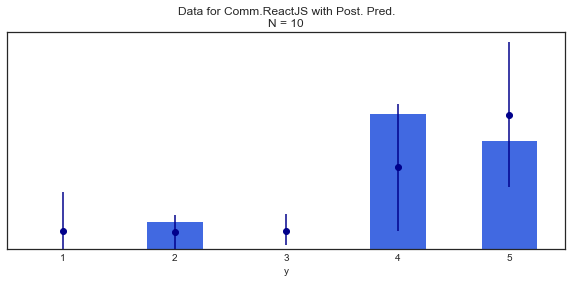

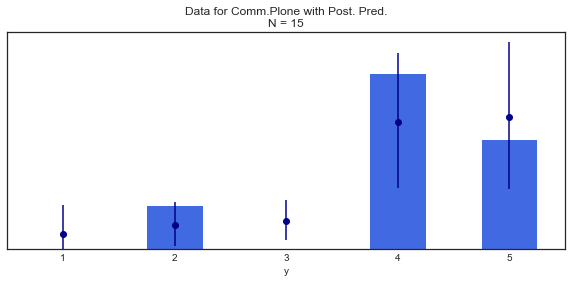

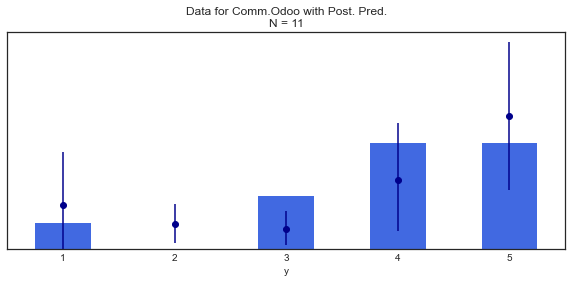

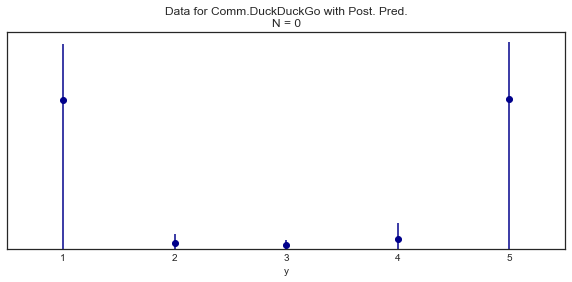

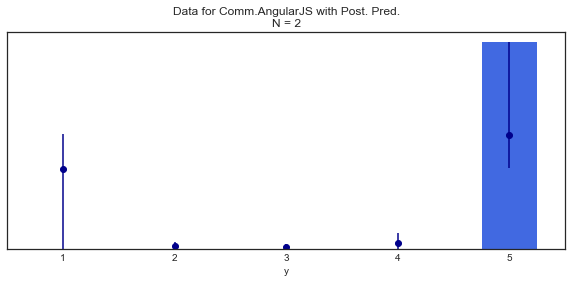

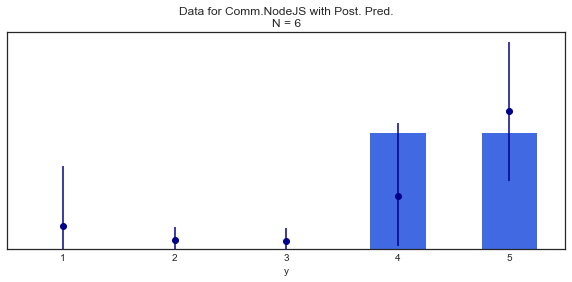

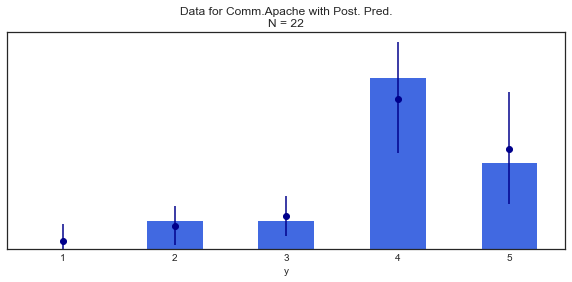

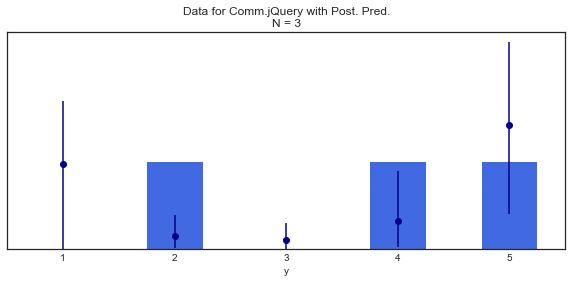

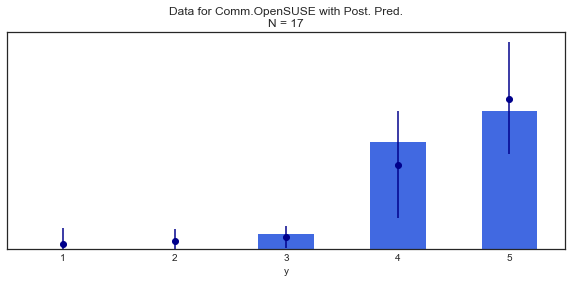

In [119]:
[ppc_count_cdfs_inferencedata(t_v29,df2,c,'V29') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V29

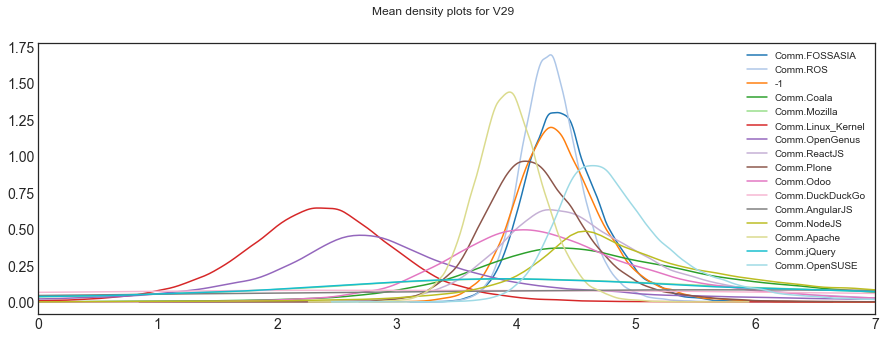

In [120]:
mean_densities_inferencedata(t_v29,'V29')

#### Trace diagnosis V29

In [121]:
pm.summary(t_v29)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.391,0.180,2.060,2.732,0.002,0.002,6721.0,6659.0,6800.0,11036.0,1.0
theta_missing[1],2.954,0.168,2.639,3.270,0.002,0.002,6114.0,6063.0,6110.0,10365.0,1.0
mu[0],4.376,0.392,3.666,5.126,0.002,0.002,27454.0,25458.0,30361.0,22093.0,1.0
mu[1],5.156,4.869,-4.254,14.118,0.030,0.024,26802.0,21344.0,26549.0,23510.0,1.0
mu[2],3.947,0.299,3.394,4.518,0.002,0.001,22709.0,22007.0,23405.0,19136.0,1.0
mu[3],5.059,1.738,2.328,8.713,0.017,0.014,10402.0,8094.0,15124.0,10121.0,1.0
mu[4],3.060,4.946,-6.541,12.094,0.028,0.025,31136.0,20243.0,31212.0,25014.0,1.0
mu[5],4.410,0.341,3.799,5.063,0.003,0.002,16673.0,15823.0,18928.0,15952.0,1.0
mu[6],2.346,0.708,0.983,3.678,0.004,0.003,25934.0,22127.0,26854.0,19465.0,1.0
mu[7],4.426,3.429,-2.094,11.538,0.022,0.020,24261.0,15197.0,25651.0,16722.0,1.0


### Question V30

#### Posterior Predictive Check V30

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


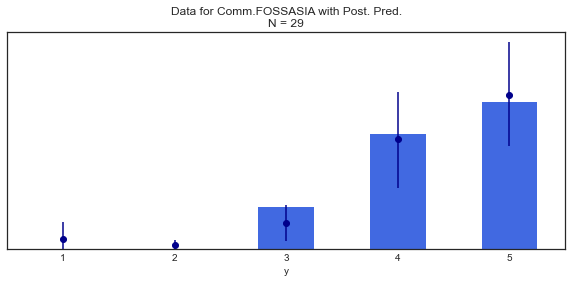

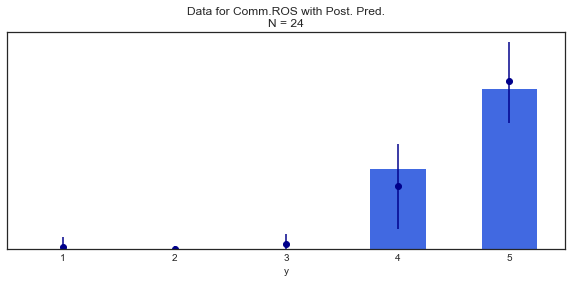

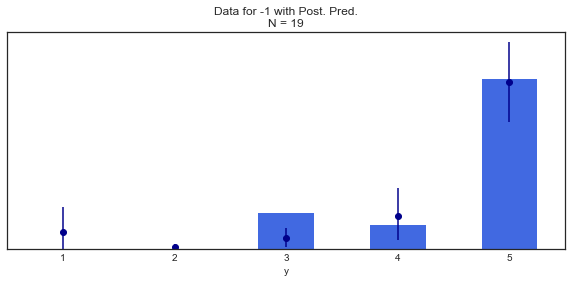

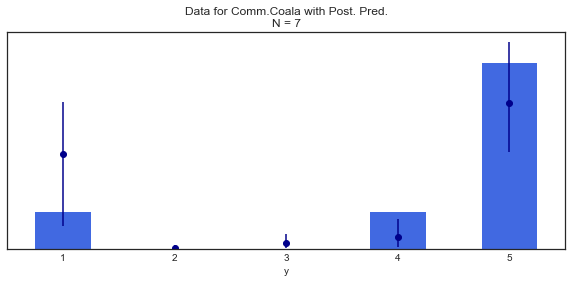

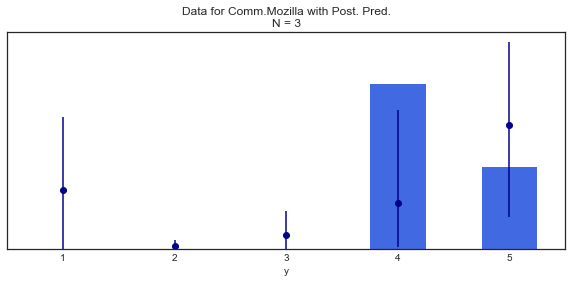

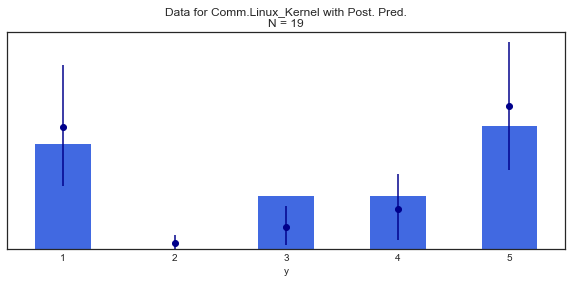

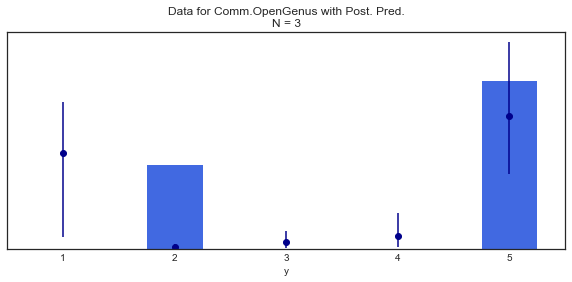

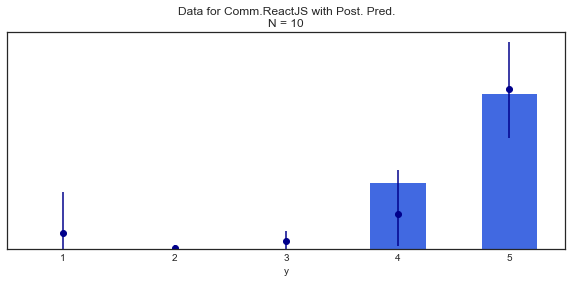

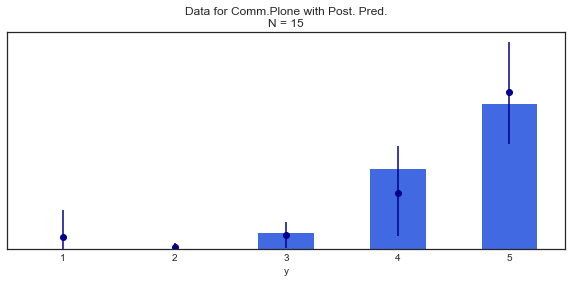

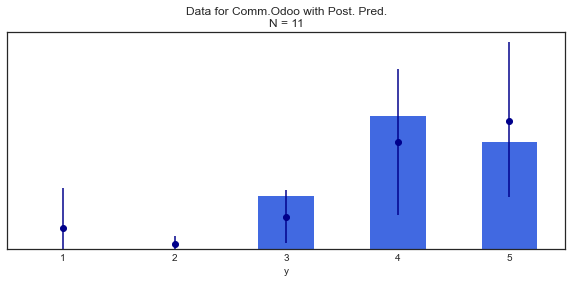

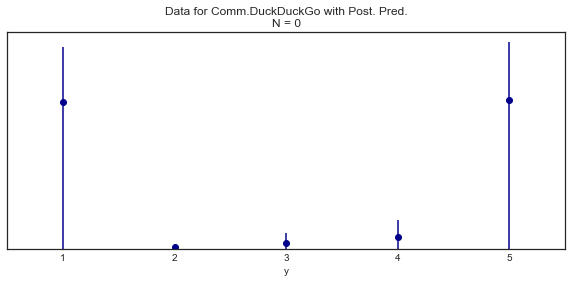

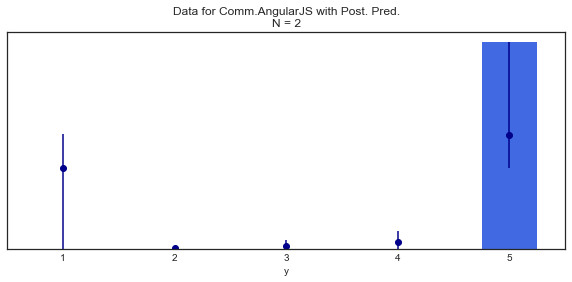

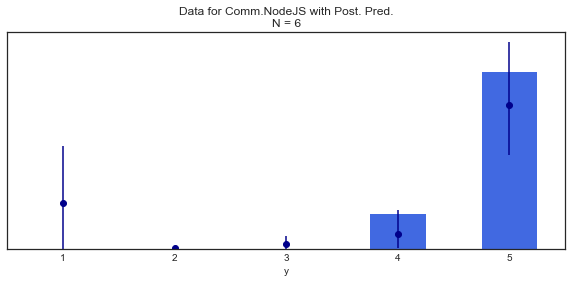

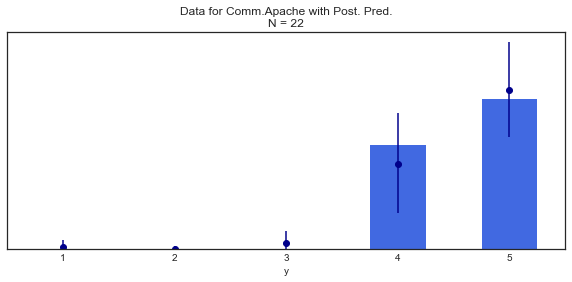

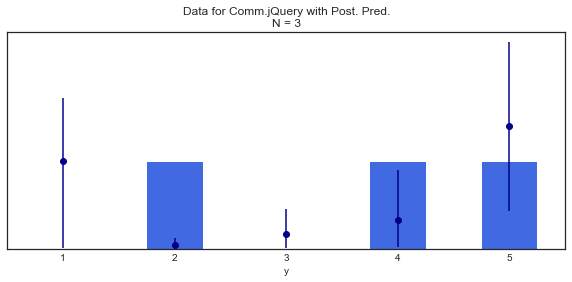

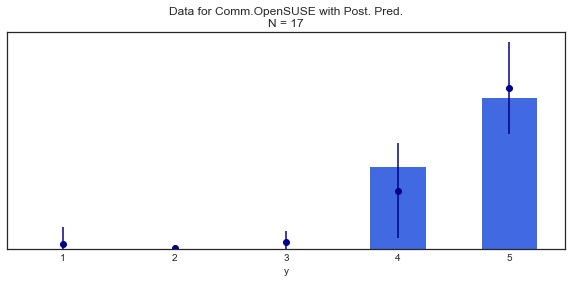

In [122]:
[ppc_count_cdfs_inferencedata(t_v30,df2,c,'V30') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V30

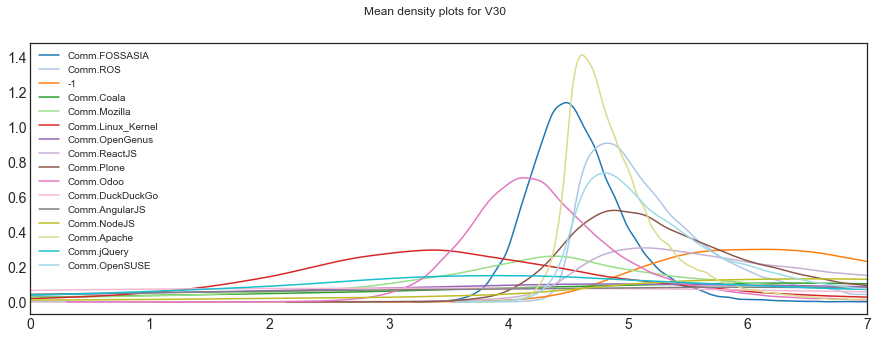

In [123]:
mean_densities_inferencedata(t_v30,'V30')

#### Trace diagnosis V30

In [124]:
pm.summary(t_v30)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],1.786,0.153,1.538,2.067,0.001,0.001,16557.0,16310.0,18101.0,21447.0,1.0
theta_missing[1],2.771,0.220,2.357,3.182,0.002,0.002,9009.0,8963.0,9018.0,14814.0,1.0
mu[0],6.868,1.641,4.386,10.002,0.015,0.011,11339.0,11309.0,12620.0,17062.0,1.0
mu[1],5.150,4.888,-4.045,14.267,0.029,0.023,27751.0,22185.0,27553.0,23404.0,1.0
mu[2],4.947,0.577,4.242,5.907,0.011,0.008,2836.0,2509.0,6272.0,3687.0,1.0
mu[3],6.289,4.153,-1.798,14.167,0.026,0.020,25923.0,21717.0,25888.0,22505.0,1.0
mu[4],3.141,4.970,-6.173,12.433,0.028,0.025,30469.0,19462.0,30464.0,23611.0,1.0
mu[5],4.574,0.406,3.862,5.344,0.003,0.002,14616.0,13488.0,17685.0,14555.0,1.0
mu[6],3.579,1.755,0.292,7.081,0.013,0.011,19009.0,12272.0,22665.0,13613.0,1.0
mu[7],4.783,2.930,-1.006,10.988,0.021,0.018,19481.0,13448.0,21270.0,15630.0,1.0


### Question V31

#### Posterior Predictive Check V31

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


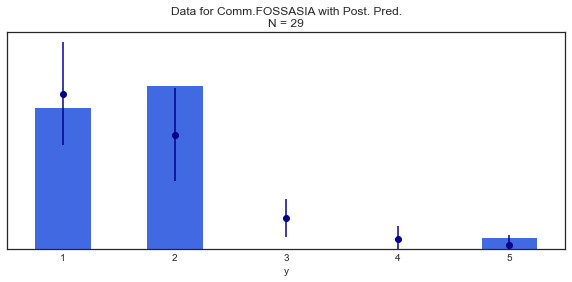

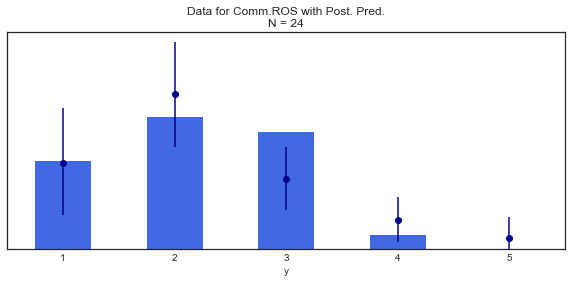

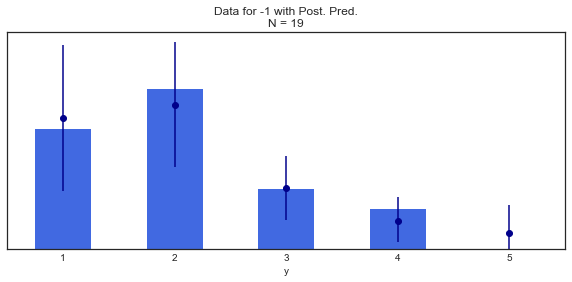

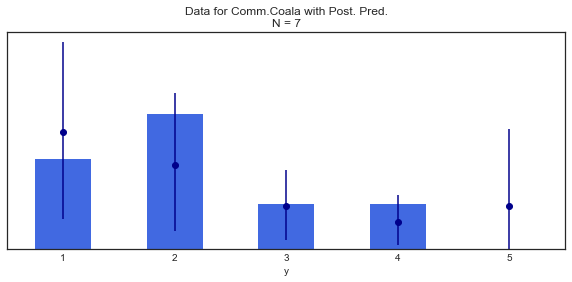

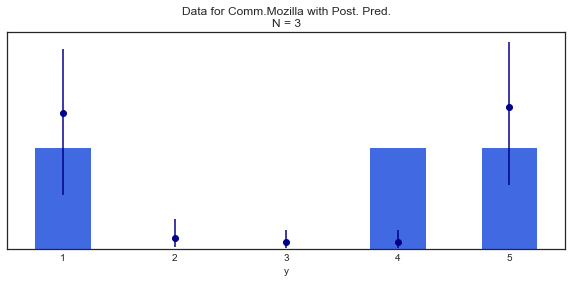

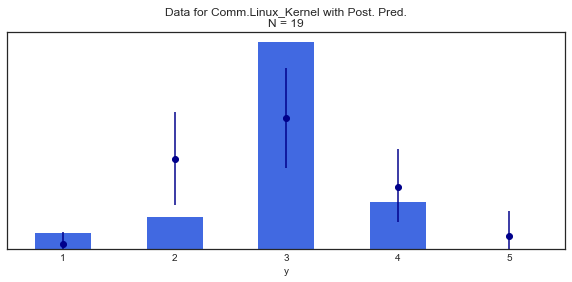

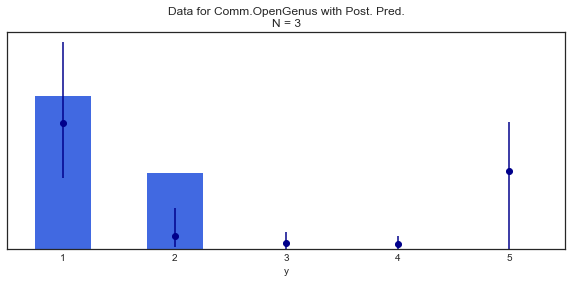

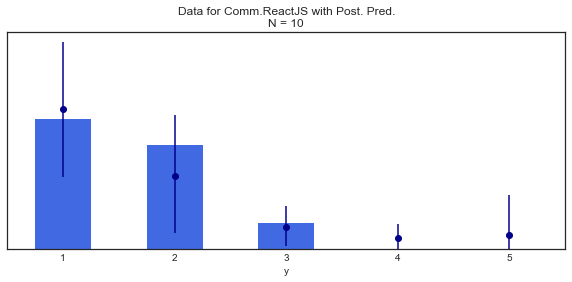

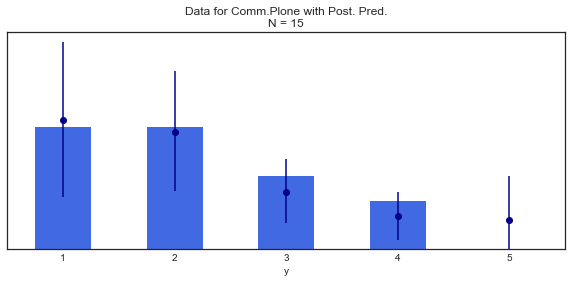

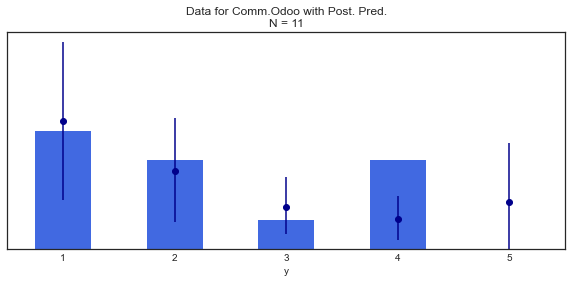

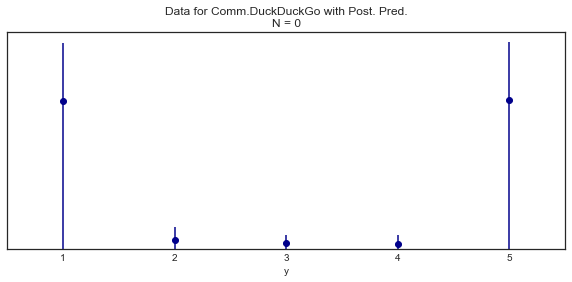

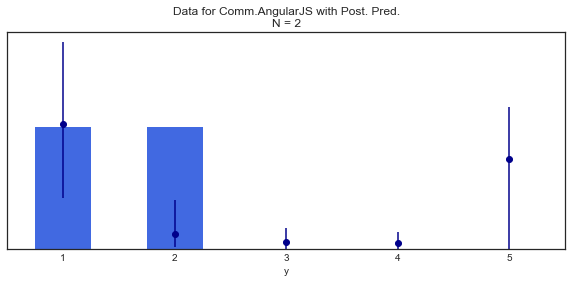

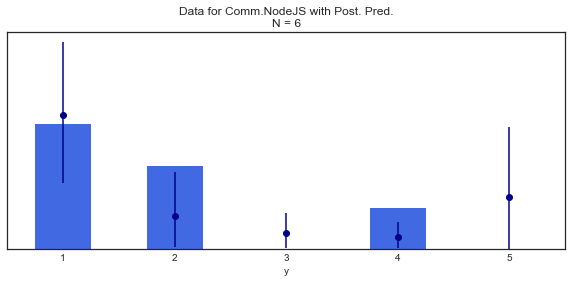

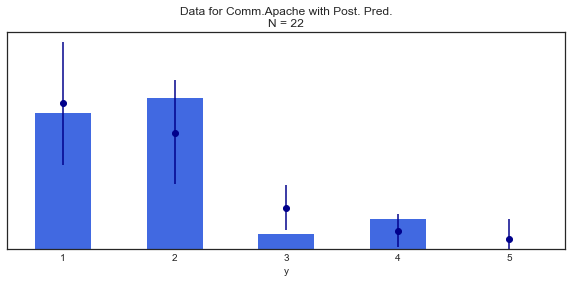

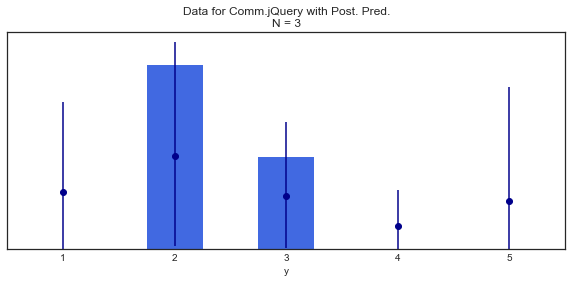

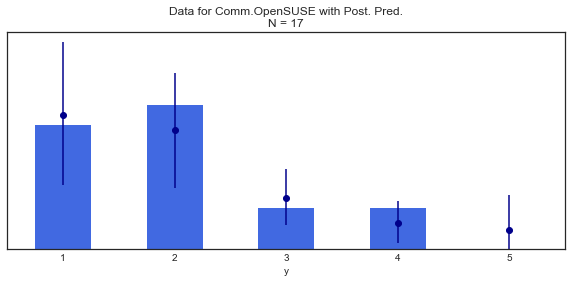

In [125]:
[ppc_count_cdfs_inferencedata(t_v31,df2,c,'V31') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V31

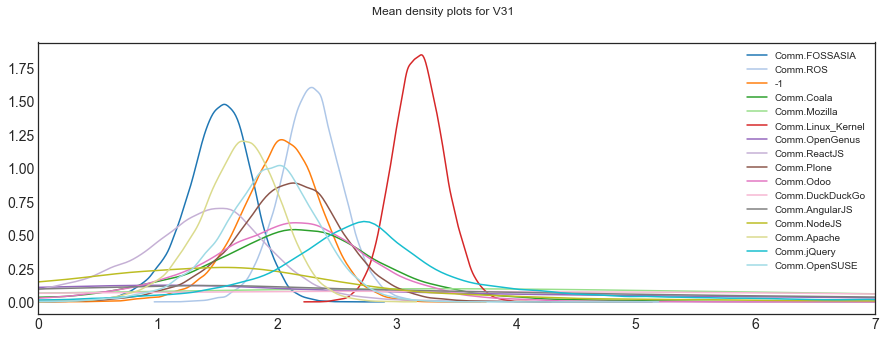

In [126]:
mean_densities_inferencedata(t_v31,'V31')

#### Trace diagnosis V31

In [127]:
pm.summary(t_v31)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.835,0.135,2.588,3.093,0.001,0.001,8733.0,8733.0,8724.0,16005.0,1.0
theta_missing[1],3.670,0.156,3.374,3.955,0.002,0.001,8172.0,8172.0,8206.0,14590.0,1.0
mu[0],2.018,0.362,1.312,2.674,0.002,0.001,33650.0,33650.0,34655.0,25623.0,1.0
mu[1],1.716,4.218,-6.228,10.211,0.025,0.024,28648.0,15922.0,29180.0,22225.0,1.0
mu[2],1.685,0.362,0.990,2.355,0.002,0.002,24332.0,24332.0,24796.0,22891.0,1.0
mu[3],2.116,1.025,0.198,4.041,0.007,0.007,19608.0,11224.0,23711.0,13658.0,1.0
mu[4],3.095,5.007,-6.031,12.738,0.029,0.026,30072.0,18822.0,30142.0,22746.0,1.0
mu[5],1.505,0.290,0.962,2.043,0.002,0.001,22663.0,22663.0,23334.0,20992.0,1.0
mu[6],3.185,0.217,2.787,3.599,0.002,0.001,11836.0,11715.0,11895.0,16957.0,1.0
mu[7],3.319,4.347,-4.771,11.698,0.025,0.023,29096.0,18217.0,29167.0,22055.0,1.0


### Question V32

#### Posterior Predictive Check V32

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


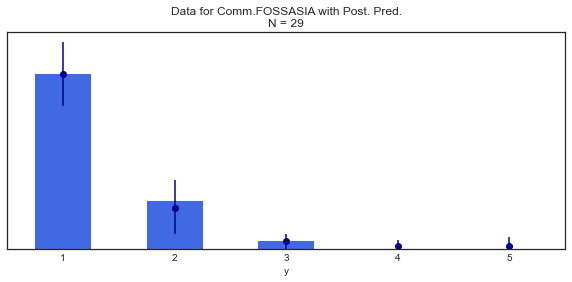

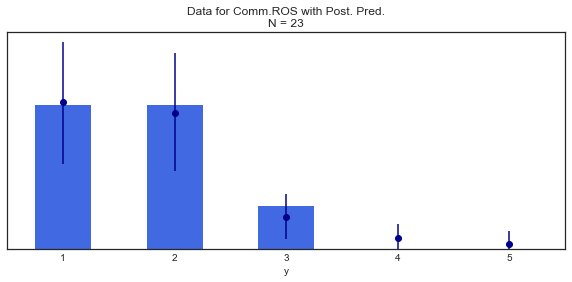

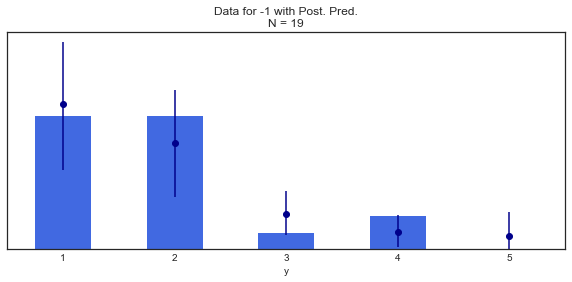

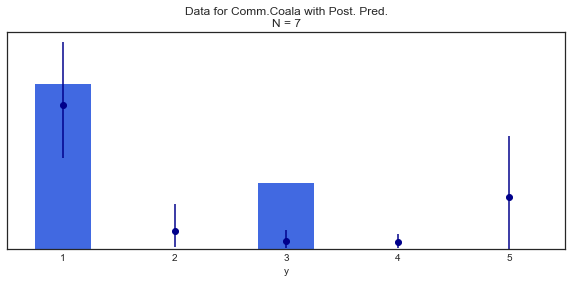

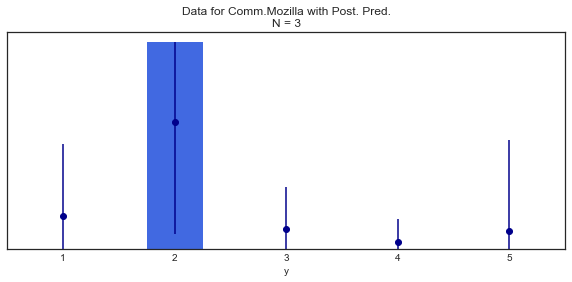

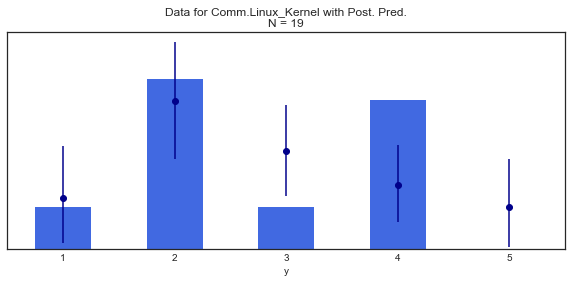

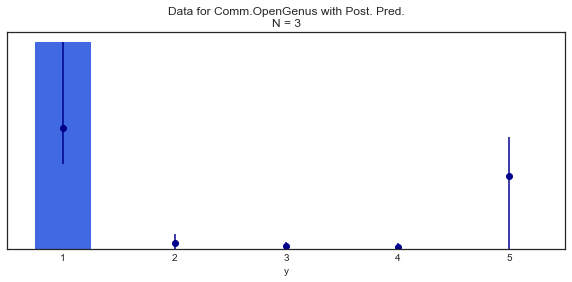

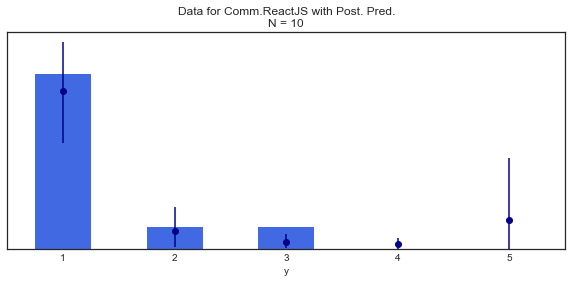

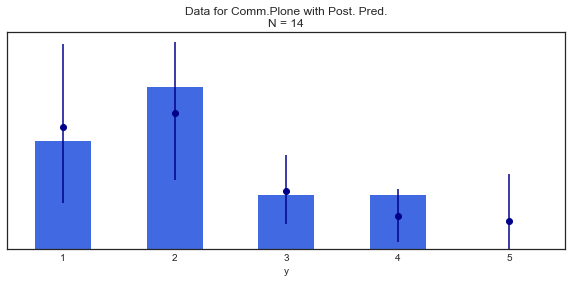

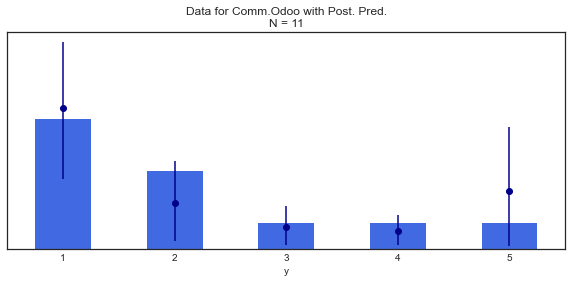

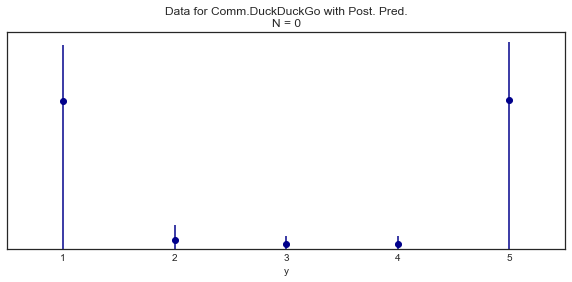

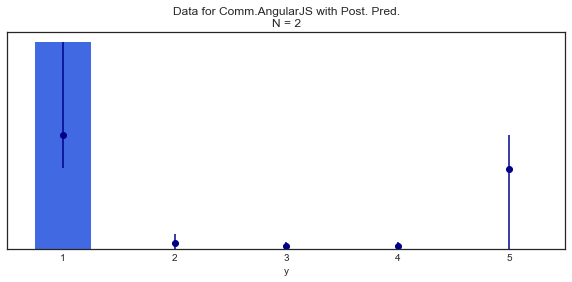

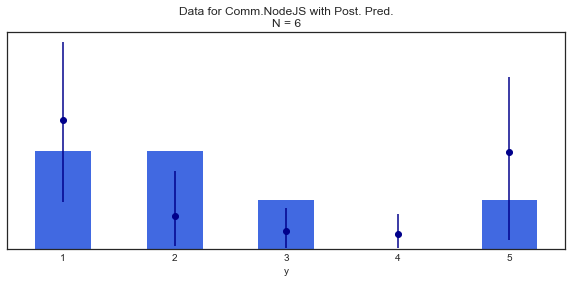

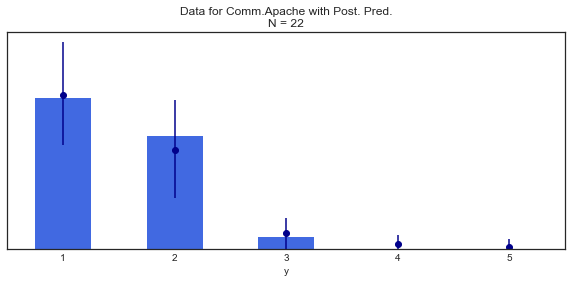

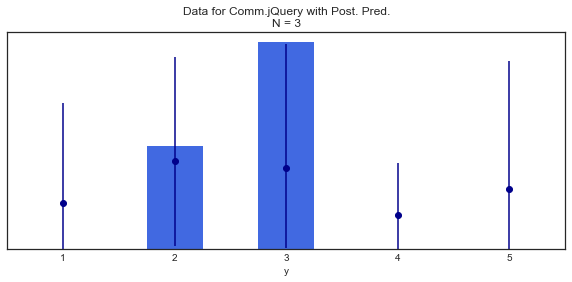

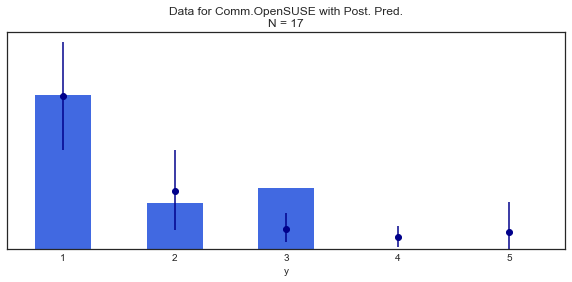

In [128]:
[ppc_count_cdfs_inferencedata(t_v32,df2,c,'V32') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V32

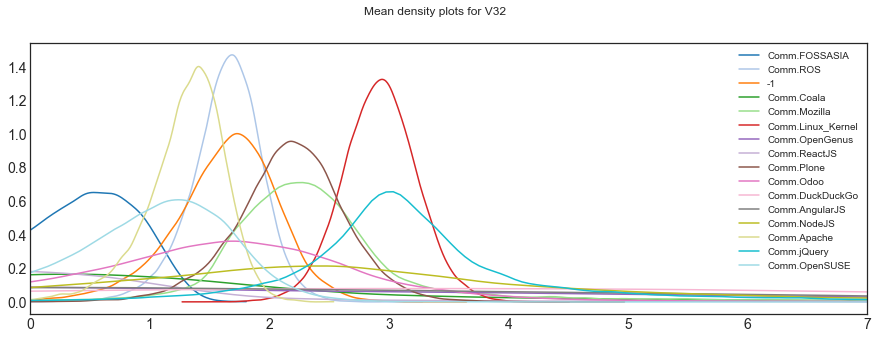

In [129]:
mean_densities_inferencedata(t_v32,'V32')

#### Trace diagnosis V32

In [130]:
pm.summary(t_v32)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.909,0.173,2.591,3.239,0.002,0.001,7313.0,7313.0,7300.0,14237.0,1.0
theta_missing[1],3.707,0.181,3.360,4.032,0.002,0.001,8182.0,8182.0,8267.0,15564.0,1.0
mu[0],1.620,0.458,0.720,2.428,0.003,0.002,25140.0,25140.0,27617.0,22141.0,1.0
mu[1],0.803,4.829,-8.357,9.828,0.029,0.025,28182.0,19321.0,28319.0,25495.0,1.0
mu[2],1.297,0.346,0.631,1.890,0.003,0.002,16481.0,16481.0,18497.0,17641.0,1.0
mu[3],-0.586,3.132,-7.177,5.165,0.022,0.020,19450.0,12663.0,20298.0,13600.0,1.0
mu[4],3.143,4.957,-6.197,12.435,0.029,0.025,30104.0,19068.0,30081.0,22810.0,1.0
mu[5],0.165,0.799,-1.332,1.343,0.011,0.008,5504.0,5504.0,6018.0,8762.0,1.0
mu[6],2.926,0.312,2.337,3.515,0.002,0.002,20433.0,20004.0,20377.0,20731.0,1.0
mu[7],2.628,1.617,0.542,5.636,0.038,0.029,1774.0,1603.0,4817.0,1905.0,1.0


### Question V33

#### Posterior Predictive Check V33

/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(
/home/pardo/.local/lib/python3.8/site-packages/arviz/stats/stats.py:493: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


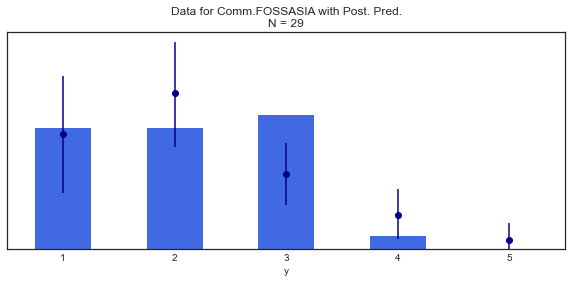

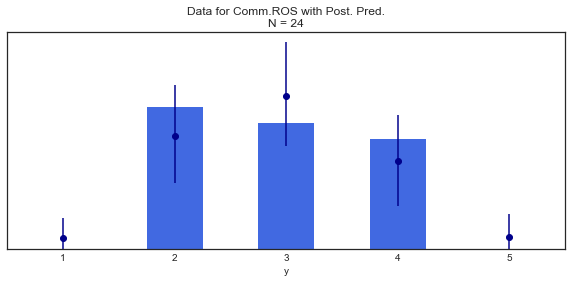

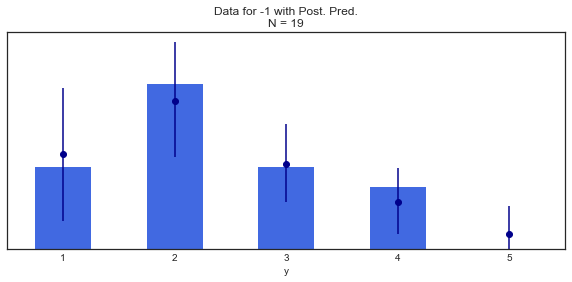

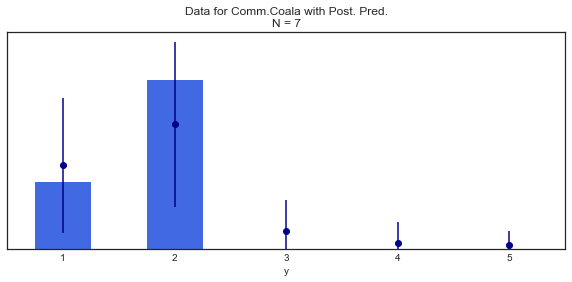

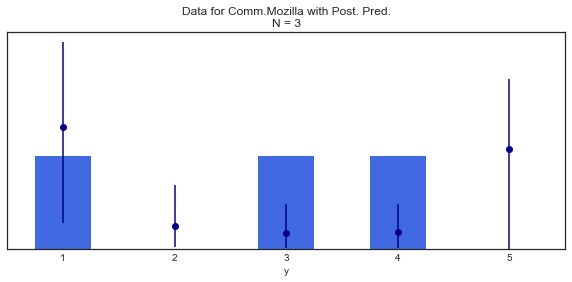

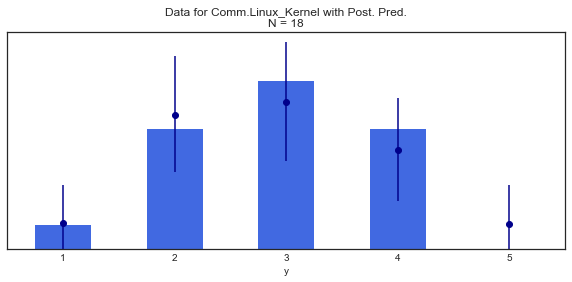

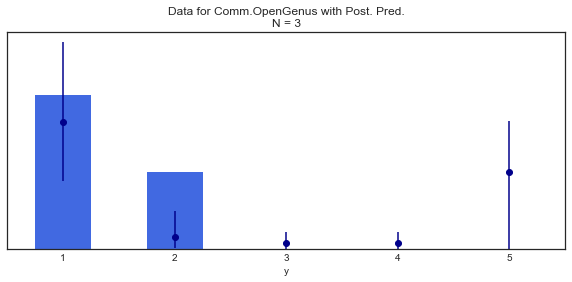

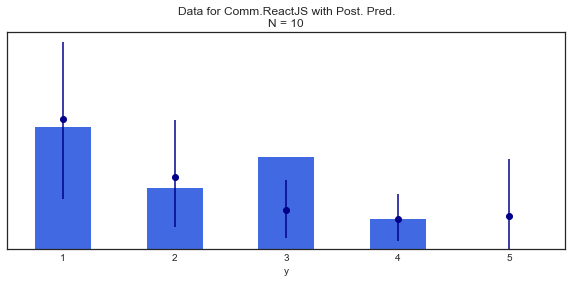

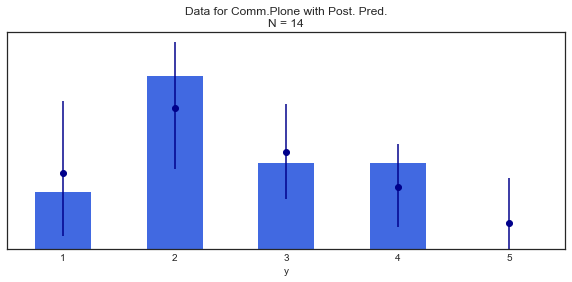

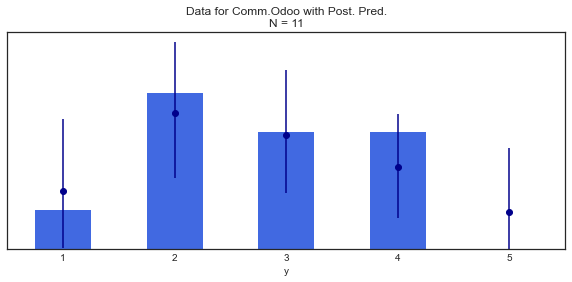

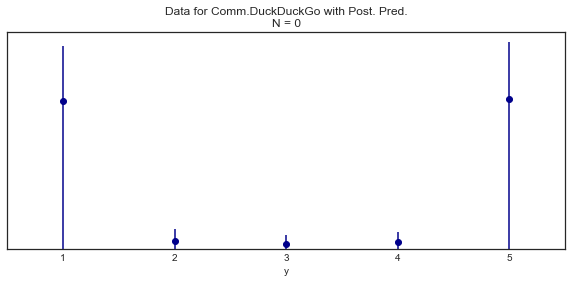

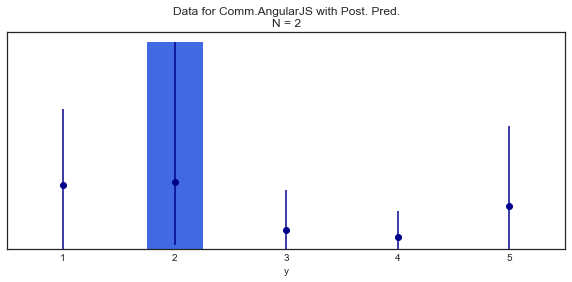

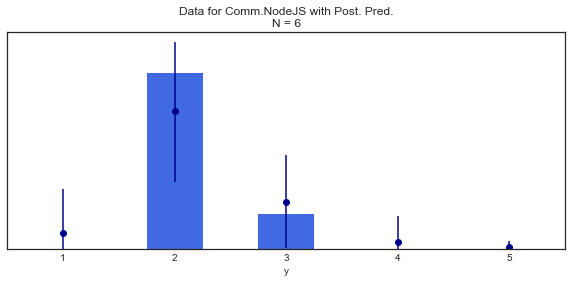

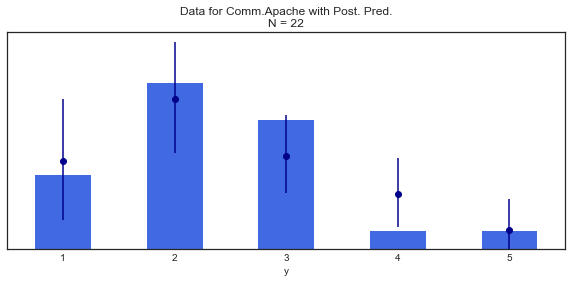

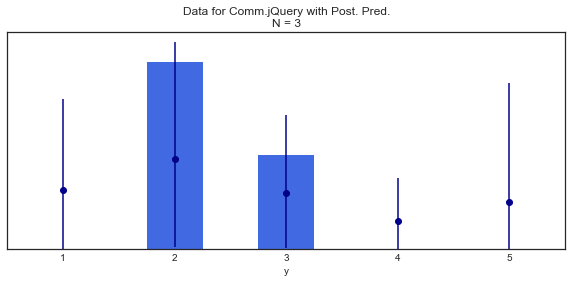

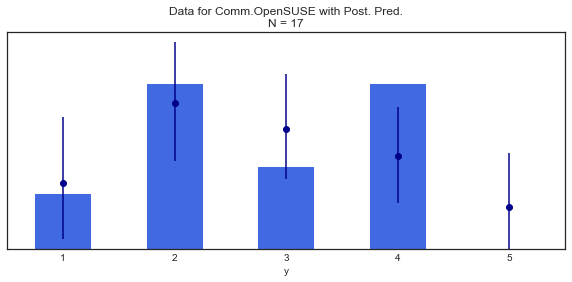

In [131]:
[ppc_count_cdfs_inferencedata(t_v33,df2,c,'V33') for c in df2.Community.unique()]
plt.show()

#### Density plot of mean distributions V33

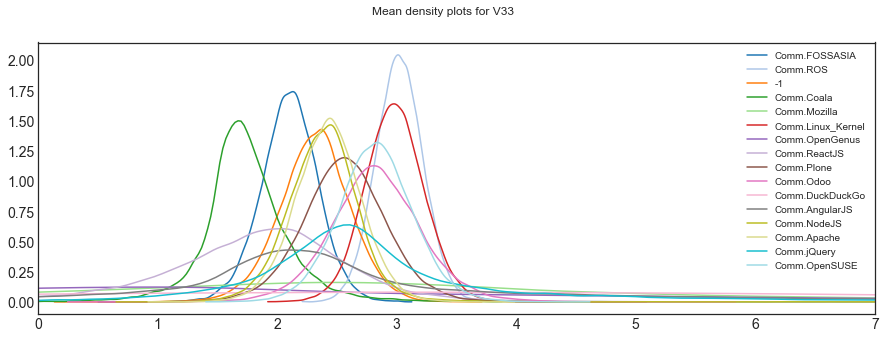

In [132]:
mean_densities_inferencedata(t_v33,'V33')

### Trace diagnosis V33

In [133]:
pm.summary(t_v33)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta_missing[0],2.684,0.123,2.452,2.915,0.002,0.001,5626.0,5626.0,5624.0,10355.0,1.0
theta_missing[1],3.497,0.141,3.232,3.756,0.002,0.001,5495.0,5495.0,5515.0,10342.0,1.0
mu[0],2.314,0.302,1.748,2.888,0.002,0.001,30508.0,30508.0,30364.0,25698.0,1.0
mu[1],2.617,2.542,-2.093,8.492,0.020,0.019,15791.0,9292.0,19575.0,12486.0,1.0
mu[2],2.424,0.279,1.887,2.943,0.002,0.001,22728.0,22119.0,22742.0,22029.0,1.0
mu[3],1.757,0.454,1.041,2.553,0.006,0.006,6151.0,2677.0,15061.0,8322.0,1.0
mu[4],3.122,4.931,-6.205,12.233,0.028,0.024,30759.0,20517.0,30725.0,24527.0,1.0
mu[5],2.101,0.241,1.643,2.555,0.002,0.001,22581.0,21862.0,22596.0,20729.0,1.0
mu[6],2.983,0.250,2.515,3.457,0.002,0.001,14991.0,14825.0,14993.0,18924.0,1.0
mu[7],2.459,3.431,-4.088,9.616,0.023,0.022,22390.0,12614.0,24062.0,16945.0,1.0


## References

###### [Kruschke 2015] John Kruschke. Doing Bayesian Data Analysis. 2nd edition. 2015.